# Note To The Reader:
<span style = "color:red"> This notebook contains the instructions from "Plan of Attack" as well as the resulting analysis. The comments/answers to the questions presented in the "Plant of attack" are highlighted in red. 
    
<span style = "color:red">  At the end of the report, After all sections of "Plan of Attack", the summary report is shown

***
***

# Your Task

Team,

The sales team is considering adding some new products to Blackwell's product mix. They have shortlisted 17 that fit Blackwell’s business strategy, but now they need help narrowing the list down to five. I would like to help the sales team by predicting the profitability of each of the potential new products.

I would like you to investigate this question by performing a detailed analysis using regression methods in RapidMiner. Specifically, I would like you to perform a regression analysis to predict the sales volume of each of the potential new products from which profitability can be estimated. In this analysis, our assumption is that certain attributes are associated with highly successful (current) products and, therefore, any potential new products that also have these attributes will be similarly successful, regardless of if a potential new product is similar to an existing product or not. 

You will use two new methods for your regression analysis — k-Nearest Neighbor (KNN) and Support Vector Machine (SVM)—and you will also explore a new method called Boosting to improve the performance of decision trees. You will need to iteratively adjust the parameters of each algorithm to get the best model. You will then compare the error metrics for your optimized models to assess which one works best. After you have trained your models and determined which one is more accurate, you will apply the model to all of the potential products to predict their sales volumes. After predicting each potential new product’s sales volume, you can predict the monthly profits by multiplying the predicted sales volume by the product’s price and its profit margin.

Please rank all products in order of highest to lowest profit. I have already set up the data for you in the attached .zip file, which contains the three CSV files you will need.

I am looking forward to reviewing your analysis. This will be a big help to the sales team.

Thank you,

Danielle
 
Danielle Sherman
Chief Technology Officer
Blackwell Electronics
www.blackwellelectronics.com

***
***

# Plan of Attack

## Your Task
You have been asked by Danielle Sherman, CTO of Blackwell Electronics, to predict the overall profitability of each of a list of potential new products using regression analysis.

This task requires you to prepare a New Product Profitability Report for Danielle Sherman. The report should be created in Excel or Word and contain the following:

A ranking of potential new products, ordered from highest to lowest profitability
A brief summary of the optimized model you selected and your rationale for selecting it. Include the parameter settings for this model
A summary of performance metrics from each individual classifier you ran

## 1. Getting Started

In Task 1 you completed a series of tasks in RapidMiner to analyze a dataset. Let’s put some structure around those tasks in the form of the series of steps that are typical of an Analytic Process.

1. Obtaining Data
2. Cleaning the Data
3. Importing Data
4. Initial Exploration of Data
5. Preprocessing
6. Feature Selection and Feature Engineering
7. Modeling and Optimization
8. Making Predictions
9. Reporting Your Findings

The steps enumerated above are not necessarily linear. Often you will make a discovery in a step that leads to a new understanding about the data. This may cause you to return to an earlier step to utilize this new knowledge.

## 2. Obtain and Prepare the Data

Download the data from Danielle Sherman’s email. Inside the zip folder you will find three files:

1. existingProductAttributes.csv – a file containing information about product features, reviews and historical sales information. You will use this file to train and test models
2. newProductAttributes.csv – a file containing product features and reviews, but no sales information. You will use this file and a trained model to make predictions about sales volume
3. profitability.xlsx – a file you will use to calculate new product profitability after you have made predictions
Data Preparation

RapidMiner (and other tools you will be using soon like R/RStudio) are powerful analytic tools, but they can’t overcome the old adage: Garbage In, Garbage Out.

Preparation of data before importing it into a tool is an extremely important task. Proper preparation can save hours of troubleshooting and frustration. The guidelines below cover typical tasks associated with “cleaning” your data for import.

* Attribute headers should always occupy the top row
* Numerals should not be the initial characters in the names of attribute headers and nominal attribute values. Often an “x” is placed before an attribute header to solve this problem. Example: 5StarReview -> x5StarReview
* Headers and nominal attribute values should not contain spaces between words. Analytic tools interpret spaces to mean that a new argument is to follow. Deleting space is often done as follows: Best Sellers Rank   -> BestSellersRank
* Special characters and symbols should be avoided. This includes {, }, ?, $, %, ^, &, *, (, ),-,#, ?,,,<,>, /, |, , [ , and ]
* Any missing data values in your data set should be replaced with NA
* Any comments embedded in the data set should be deleted
 

#### Your Tasks:

1. Open the existingProductAttributes.csv file with Excel. Inspect the data set and make updates based on the preparation guidelines above. Check attribute headers, nominal attribute values and address missing values. Save the file when you are finished.
    * <span style="color:red">*for simplicity, I have done this procedure in python, as shown below. As a general comment though I feel like these header specifications are a bit too extreme, but we apply them to each header in all the data frames (dfs)* </span> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import sklearn

In [2]:
!ls './Product_Analysis_Data'

existingProductAttributes.csv profitability.xlsx
newProductAttributes.csv


### 2.1.1 Load the Data Sets

In [3]:
#define root path
rootpath = './Product_Analysis_Data'

#fetch files in rootpath
def listdir_nohidden(path):
    files = np.array(os.listdir(path))
    file_names = files[np.where(files!='.DS_Store')]
    file_paths = [path+'/'+file_name for file_name in file_names]
    return file_paths, file_names

file_paths, file_names = listdir_nohidden(rootpath)
pd.DataFrame(file_names,columns = ['file_names'])

,file_names
0,profitability.xlsx
1,newProductAttributes.csv
2,existingProductAttributes.csv


In [4]:
#Load the profit data
df_profit = pd.read_excel(file_paths[0],header = 1) # header=1 => Attribute headers should always occupy the top row
#print('\n'+file_names[0])
#display(df_profit)
#display(df_profit.describe())

df_newAttributes = pd.read_csv(file_paths[1])
#print('\n'+file_names[1])
#display(df_newAttributes)
#display(df_newAttributes.describe())

df_existingAttributes = pd.read_csv(file_paths[2])
#print('\n'+file_names[2])
#display(df_oldAttributes)
#display(df_oldAttributes.describe())

### 2.1.2 View Common Columns & Join Data

In [5]:
#View the headers only
display(pd.DataFrame(df_profit.columns,columns = ['df_profit headers']))
display(pd.DataFrame(df_newAttributes.columns, columns = ['df_newAtrributes headers']))
display(pd.DataFrame(df_existingAttributes.columns, columns = ['df_existingAtrributes headers']))


,df_profit headers
0,Product Type
1,Product #
2,Brand Name
3,Price
4,5 Star Reviews
5,4 Star Reviews
6,3 Star Reviews
7,2 Star Reviews
8,1 Star Reviews
9,Positive Service Review


,df_newAtrributes headers
0,'Product Type'
1,'Product #'
2,Price
3,'5 Star Reviews'
4,'4 Star Reviews'
5,'3 Star Reviews'
6,'2 Star Reviews'
7,'1 Star Reviews'
8,'Positive Service Review'
9,'Negative Service Review'


,df_existingAtrributes headers
0,Product Type
1,Product #
2,Price
3,5 Star Reviews
4,4 Star Reviews
5,3 Star Reviews
6,2 Star Reviews
7,1 Star Reviews
8,Positive Service Review
9,Negative Service Review


In [6]:
#Fix Errors in the column headers
df_newAttributes.columns = df_newAttributes.columns.str.replace("'", "")
df_profit.columns = df_profit.columns.str.replace('Sales Volume','Volume')

In [7]:
#Add Data ID Column
df_profit['Data ID']='Profit Data'
df_newAttributes['Data ID']='New Product Attributes Data'
df_existingAttributes['Data ID'] = 'Old Product Attributes Data'

In [8]:
# Standardize Header Names According to the Specified Nomenclature in the problem set
def standardize_headers(df):
    # Numerals should not be the initial characters in the names of attribute headers and nominal attribute values. Often an “x” is placed before an attribute header to solve this problem. Example: 5StarReview -> x5StarReview
    for header in df.columns:
        try:
            if isinstance(float(header[0]), (int, float)):
                    df.columns = df.columns.str.replace(header,'x'+header)
        except Exception:
            sys.exc_info

    # Headers and nominal attribute values should not contain spaces between words. Analytic tools interpret spaces to mean that a new argument is to follow. Deleting space is often done as follows: Best Sellers Rank   -> BestSellersRank
    df.columns = df.columns.str.replace(' ','')

    # Special characters and symbols should be avoided. This includes {, }, ?, $, %, ^, &, *, (, ),-,#, ?,,,<,>, /, |, , [ , and ]
    illegal_chars = ['{', '}', '?', '$', '%', '^', '&', '*', '(', ')','-','#', '?',',','<','>', '/', '|', '[' ,']']
    for char in illegal_chars:
        if char == '#':
            df.columns = df.columns.str.replace(char,'num')
        else:
            df.columns = df.columns.str.replace(char,'')

    # Any missing data values in your data set should be replaced with NA
        #This is done automatically upon inport

    # Any comments embedded in the data set should be deleted
        #This is done automatically upon inport
    return df

#Update Headers
df_profit = standardize_headers(df_profit)
df_newAttributes = standardize_headers(df_newAttributes)
df_existingAttributes = standardize_headers(df_existingAttributes)

#Display new Headers
pd.DataFrame(df_existingAttributes.columns, columns = ['Reformatted Headers'])

,Reformatted Headers
0,ProductType
1,Productnum
2,Price
3,x5StarReviews
4,x4StarReviews
5,x3StarReviews
6,x2StarReviews
7,x1StarReviews
8,PositiveServiceReview
9,NegativeServiceReview


2. Open the newProductAttributes.csv file with Excel. Any edits you made to the existingProductAttributs.csv file must also be made identically to newProductAttributes.csv. 
You are ready to import the data in the next step. Note that anything you may have missed could cause issues later. If your analysis hits a roadblock consider revisiting your data preparation as a step in troubleshooting.

## 3. Import and Initially Explore the Data
Using the skills you learned in Task 1, import the existingProductAttributes.csv file into RapidMiner. After upload, explore the data via the Statistics and Charts tabs.

### 3.1. Which product has the highest number of 5 Star Reviews?


In [9]:
Field_of_Interest = 'x5StarReviews'

index_of_max = df_existingAttributes[Field_of_Interest].idxmax()
display(pd.DataFrame(df_existingAttributes.iloc[index_of_max]))

print("The product with the highest number of 5 star reviews is: Product # <",df_existingAttributes['Productnum'].iloc[index_of_max],">")

,49
ProductType,Accessories
Productnum,150
Price,49.99
x5StarReviews,2801
x4StarReviews,431
x3StarReviews,157
x2StarReviews,154
x1StarReviews,270
PositiveServiceReview,536
NegativeServiceReview,22


The product with the highest number of 5 star reviews is: Product # < 150 >


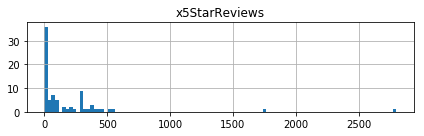

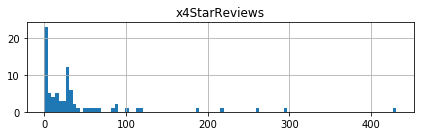

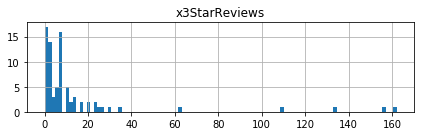

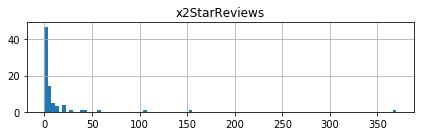

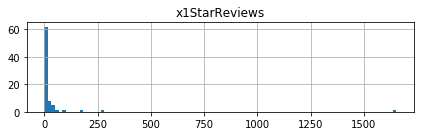

In [10]:
#Create Histograms
y_scaler = .5;
x_scaler = 1

df_existingAttributes.hist(column='x5StarReviews',bins=100)
plt.tight_layout(rect = (0, 0, x_scaler, y_scaler))
plt.show()

df_existingAttributes.hist(column='x4StarReviews',bins=100)
plt.tight_layout(rect = (0, 0, x_scaler, y_scaler))
plt.show()

df_existingAttributes.hist(column='x3StarReviews',bins=100)
plt.tight_layout(rect = (0, 0, x_scaler, y_scaler))
plt.show()

df_existingAttributes.hist(column='x2StarReviews',bins=100)
plt.tight_layout(rect = (0, 0, x_scaler, y_scaler))
plt.show()

df_existingAttributes.hist(column='x1StarReviews',bins=100)
plt.tight_layout(rect = (0, 0, x_scaler, y_scaler))
plt.show()


### 3.2. Which product has the highest sales volume?


In [11]:
Field_of_Interest = 'Volume'

index_of_max = df_existingAttributes[Field_of_Interest].idxmax()
display(pd.DataFrame(df_existingAttributes.iloc[index_of_max]))

print("The product with the highest sales volume is: Product # <",df_existingAttributes['Productnum'].iloc[index_of_max],">")

,49
ProductType,Accessories
Productnum,150
Price,49.99
x5StarReviews,2801
x4StarReviews,431
x3StarReviews,157
x2StarReviews,154
x1StarReviews,270
PositiveServiceReview,536
NegativeServiceReview,22


The product with the highest sales volume is: Product # < 150 >


### 3.3. Do the data types match your expectations? 


In [12]:
#Reformat headers for existing attributes df
df_existingAttributes.to_csv(path_or_buf='df_ExisitingAttributes_Reformated.csv')

In [13]:
!ls

Predicting_Profitability_Analysis.ipynb Xy_predicted_test_unscaled.csv
Product_Analysis_Data                   df_ExisitingAttributes_Reformated.csv


<span style="color:red">*We ignore this question, as it is not really applicable in python* </span> 

### 3.4. Use Statistics and Charts to look for other relationships that may be useful to your analysis.

In [14]:
df_existingAttributes.describe()

,Productnum,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Wouldconsumerrecommendproduct,BestSellersRank,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Profitmargin,Volume
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,65.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000
mean,142.550000,247.251125,176.250000,40.200000,14.787500,13.787500,37.675000,51.750000,6.225000,0.745000,1126.307692,9.668125,14.425250,7.819000,6.258625,0.15450,705.000000
std,26.732572,339.574925,379.193698,70.741891,30.963717,45.924455,186.718483,104.471606,14.304974,0.197388,3261.130095,15.207573,34.930846,6.814665,6.888852,0.11639,1516.774793
min,101.000000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.000000,0.010000,0.000000,0.000000,0.000000,0.05000,0.000000
25%,120.750000,52.665000,10.000000,2.750000,2.000000,1.000000,2.000000,2.000000,1.000000,0.700000,7.000000,0.512500,4.775000,1.750000,0.400000,0.05000,40.000000
50%,140.500000,132.720000,50.000000,22.000000,7.000000,3.000000,8.500000,5.500000,3.000000,0.800000,27.000000,2.100000,7.950000,6.800000,3.950000,0.12000,200.000000
75%,160.250000,352.490000,306.500000,33.000000,11.250000,7.000000,15.250000,42.000000,6.250000,0.900000,281.000000,11.205000,15.025000,11.275000,10.300000,0.20000,1226.000000
max,200.000000,2249.990000,2801.000000,431.000000,162.000000,370.000000,1654.000000,536.000000,112.000000,1.000000,17502.000000,63.000000,300.000000,31.750000,25.800000,0.40000,11204.000000


In [15]:
def plot(df,x_label,y_label):
    plt.plot(df[x_label],df[y_label],'ob')
    plt.xlabel(x_label,fontsize = 16)
    plt.ylabel(y_label,fontsize = 16)
    plt.grid(which='major',color = 'dimgray')
    plt.grid(which='minor',color='lightgray')
    plt.tick_params(axis='both',labelsize = 14)
    
def loglog_plot(df,x_label,y_label):
    plot(df,x_label,y_label)
    plt.xscale("log")
    plt.yscale("log")

def plot_y_vs_columns_of_interest(df,
                                  columns_of_interest,
                                  y_label='Volume',
                                  xy_scale = 'loglog'):
    i=1
    for column in columns_of_interest:
        try:
            plt.subplot(int(len(columns_of_interest)/2),2,i)
            if xy_scale == 'loglog':
                loglog_plot(df,column,y_label)
            elif xy_scale == 'linear':
                plot(df_existingAttributes,column,'Volume')
            i = i+1
        except:
            print('Could not plot Volume vs. '+column)
    plt.tight_layout(rect=[0,0,2,10])
    plt.show()


 plotting on log log scale
Could not plot Volume vs. DataID


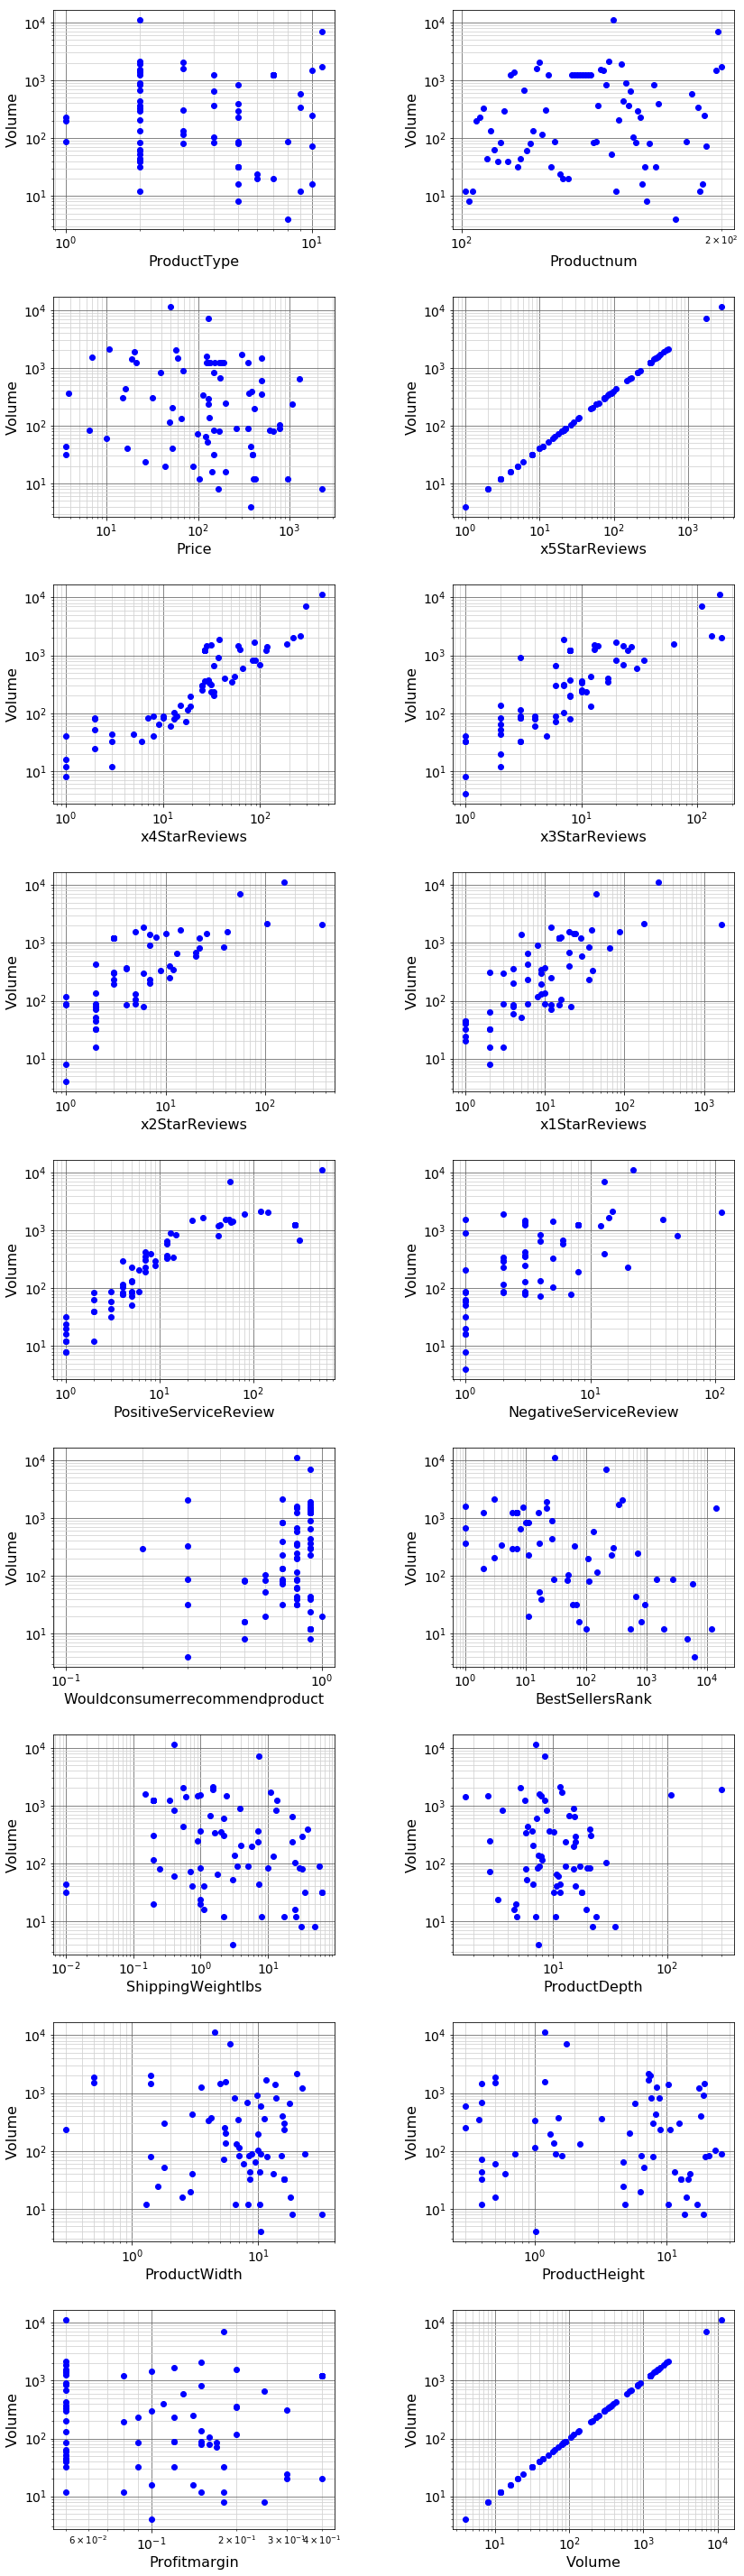


 plotting on linear scale
Could not plot Volume vs. DataID


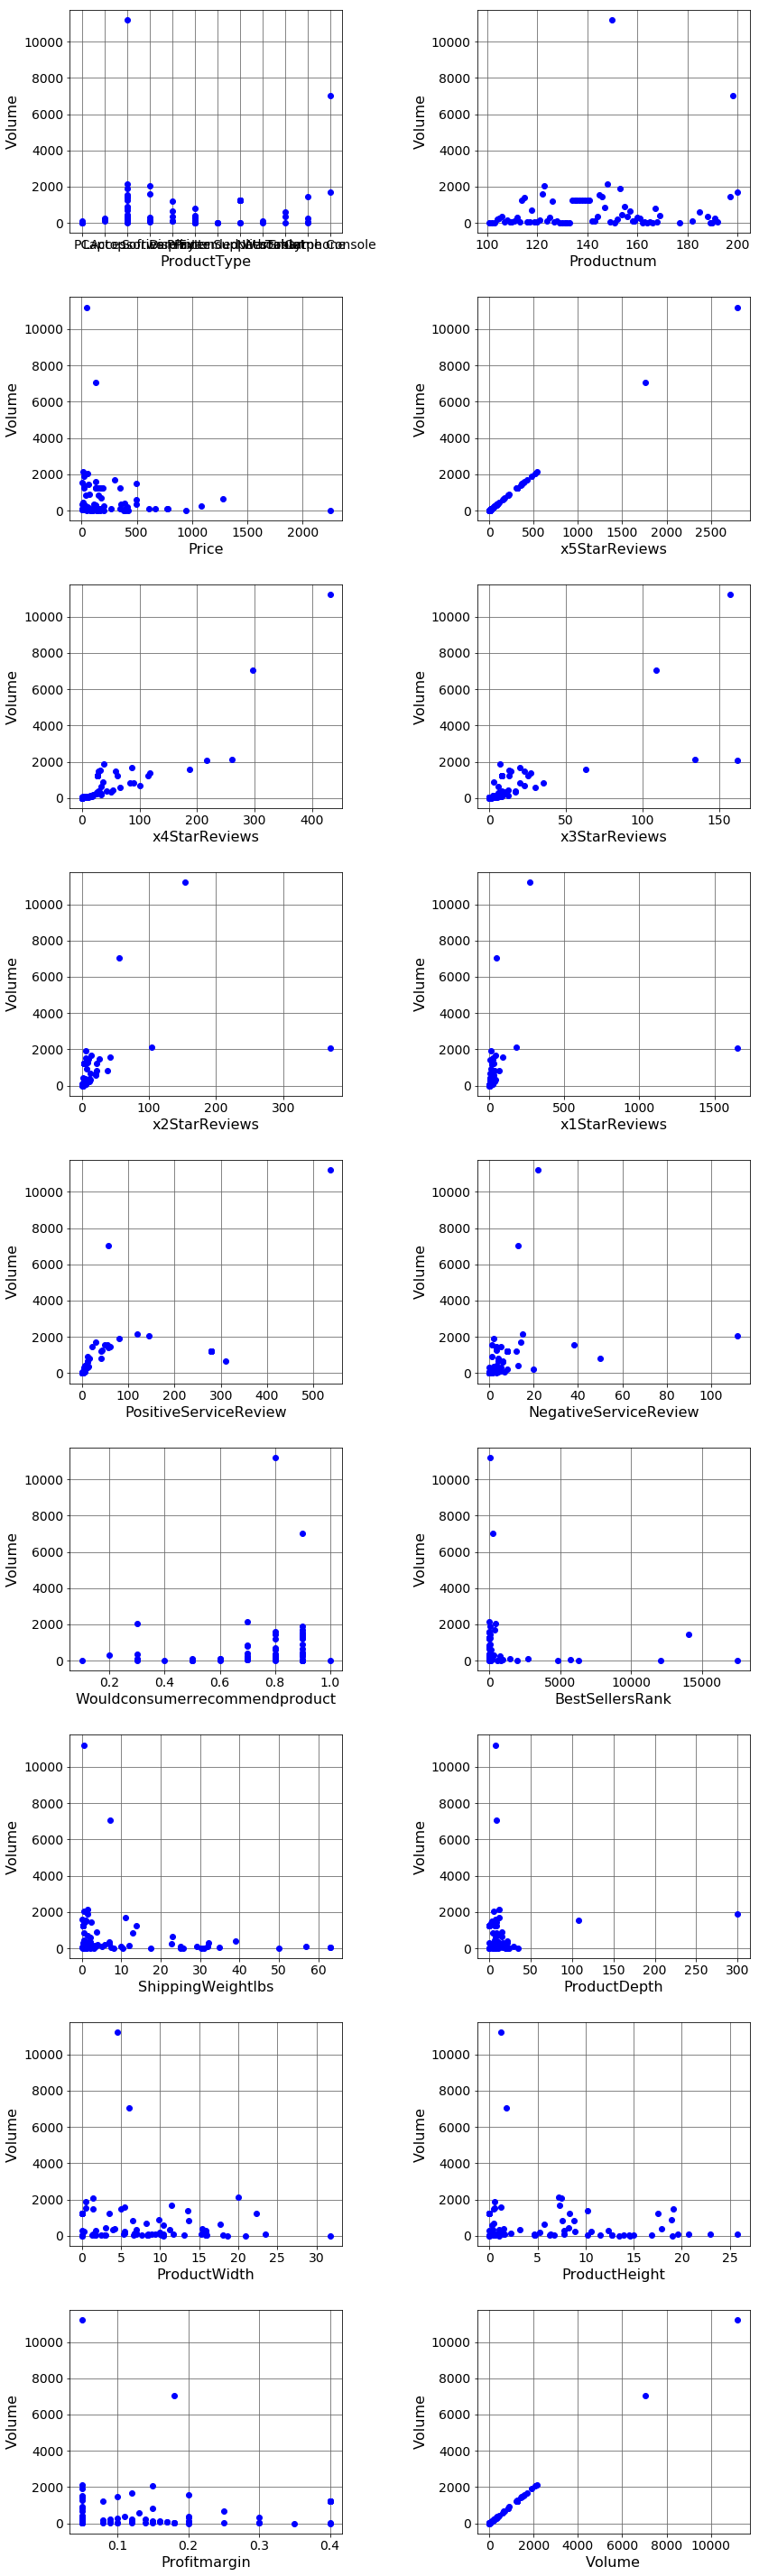

In [16]:
#Sweep through data and build multi-variate plots
print('\n plotting on log log scale')
plot_y_vs_columns_of_interest(df_existingAttributes,
                              columns_of_interest = df_existingAttributes.columns,
                              y_label='Volume',
                             xy_scale='loglog')
    
    
print('\n plotting on linear scale')
plot_y_vs_columns_of_interest(df_existingAttributes,
                              columns_of_interest = df_existingAttributes.columns,
                              y_label='Volume',
                             xy_scale='linear')


#### Comments

<span style = 'color:red'> 
* <span style="color:red"> Positive Correlations w/ Volume:
    * 1, 2, 3, 4, and 5 star
        *5 Star shows strangely ideal log-log relationship between 5 star reviews and volume
    * Negative Service Review (only affects > 40 volume)
    * positive service reviews
* <span style="color:red"> Negative Correlations w/ Volume:
    * Best Sellers Rank
    * Price (weak)
    * Shipping Weight
    

## 4. Preprocess the data
There are three attributes that need attention: Product Type, Product Number and Best Sellers Rank.

* Product Type is a Polynominal attribute. Since we are working on a regression problem, this type of data can’t be measured as it has no numeric value. We will remove this attribute now, but later in the course you will learn how to include nominal attributes when working with regression.

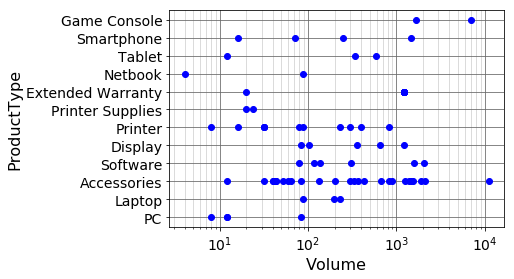

In [17]:
plot(df_existingAttributes,'Volume','ProductType')
plt.xscale('log')

In [18]:
#Drop the product type column
df_existingAttributes = df_existingAttributes.drop(['ProductType'],axis=1)
df_existingAttributes.head()

,Productnum,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Wouldconsumerrecommendproduct,BestSellersRank,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Profitmargin,Volume,DataID
0,101,949.00,3,3,2,0,0,2,0,0.9,1967.0,25.8,23.94,6.62,16.89,0.15,12,Old Product Attributes Data
1,102,2249.99,2,1,0,0,0,1,0,0.9,4806.0,50.0,35.00,31.75,19.00,0.25,8,Old Product Attributes Data
2,103,399.00,3,0,0,0,0,1,0,0.9,12076.0,17.4,10.50,8.30,10.20,0.08,12,Old Product Attributes Data
3,104,409.99,49,19,8,3,9,7,8,0.8,109.0,5.7,15.00,9.90,1.30,0.08,196,Old Product Attributes Data
4,105,1079.99,58,31,11,7,36,7,20,0.7,268.0,7.0,12.90,0.30,8.90,0.09,232,Old Product Attributes Data


* Product Number is an integer attribute. Things like product numbers and IDs are part of a special data class called unique identifiers. Unique identifiers typically do not add value to analysis. For example, how would you measure a meaningful difference between product 101 and 112? Product Number should be removed to reduce “noise” in the data. We can set this feature as an ID so it wont be used in the model, but will still be available in the results.

<span style="color:red">*This is a particularly interesting case, since there is actually a correlation between best seller rank and product number, however it is likely the case because product ID may have been asigned by going through a largely sorted list based on best seller rank. This highlights how some 'features' in data may actually just be fake, which one could not know without domain knowledge* </span> 

* Best Sellers Rank contains missing data. Consult resources for methods that deal with missing data. In this task we should remove the attribute, but that isnt the case in all situations.

In [19]:
#Drop the product type column
df_existingAttributes = df_existingAttributes.drop(['BestSellersRank'],axis=1)
df_existingAttributes.head()

,Productnum,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Wouldconsumerrecommendproduct,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Profitmargin,Volume,DataID
0,101,949.00,3,3,2,0,0,2,0,0.9,25.8,23.94,6.62,16.89,0.15,12,Old Product Attributes Data
1,102,2249.99,2,1,0,0,0,1,0,0.9,50.0,35.00,31.75,19.00,0.25,8,Old Product Attributes Data
2,103,399.00,3,0,0,0,0,1,0,0.9,17.4,10.50,8.30,10.20,0.08,12,Old Product Attributes Data
3,104,409.99,49,19,8,3,9,7,8,0.8,5.7,15.00,9.90,1.30,0.08,196,Old Product Attributes Data
4,105,1079.99,58,31,11,7,36,7,20,0.7,7.0,12.90,0.30,8.90,0.09,232,Old Product Attributes Data


#### Optional:
Consider the remaining attributes. Are there any that do not seem relevant to predicting Sales Volume?

In [20]:
#Fetch all the columns which having missing data
pd.DataFrame(df_existingAttributes.columns[df_existingAttributes.isnull().any()])

,0


<span style="color:red"> In the data visualization, we can see that 5-star has a 1-1 correlation with volume, so we will also drop this data, since it is likely some error in the data set

In [21]:
#Drop the product type column
df_existingAttributes = df_existingAttributes.drop(['x5StarReviews'],axis=1)
df_existingAttributes.head()

,Productnum,Price,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Wouldconsumerrecommendproduct,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Profitmargin,Volume,DataID
0,101,949.00,3,2,0,0,2,0,0.9,25.8,23.94,6.62,16.89,0.15,12,Old Product Attributes Data
1,102,2249.99,1,0,0,0,1,0,0.9,50.0,35.00,31.75,19.00,0.25,8,Old Product Attributes Data
2,103,399.00,0,0,0,0,1,0,0.9,17.4,10.50,8.30,10.20,0.08,12,Old Product Attributes Data
3,104,409.99,19,8,3,9,7,8,0.8,5.7,15.00,9.90,1.30,0.08,196,Old Product Attributes Data
4,105,1079.99,31,11,7,36,7,20,0.7,7.0,12.90,0.30,8.90,0.09,232,Old Product Attributes Data


### Normalization

After inspecting the data you can see that individual features are not represented by the same units. For example: prices represented in some unit of currency, weight is represented by some unit of weight and volume represent volume, regardless of the type of unit. Whenever we are dealing with machine learning tasks like regression we should always make sure that all of our features are represented on the same scale. We do this in order to prevent any one specific feature possibly biasing the model we build.

Normalization is done with some fancy mathematics, but luckily for us there is a 'normalize' operator we can use in RapidMiner. Add it to your current process and select all of the features using the subset parameter of the operator. 



In [22]:
import sklearn.preprocessing

def scale_the_data(df,
                   mode = 'fit_transform'):
    import sklearn.preprocessing
    
    #Define numeric data types
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    nonnumerics = ['object']

    #Select only numeric data for scaling
    df_numeric = df.select_dtypes(include=numerics)
    df_nonnumeric = df.select_dtypes(include=nonnumerics)

    #Scale the data
    if mode == 'fit_transform':
        globals()['scaler'] = sklearn.preprocessing.MinMaxScaler()
        df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric))
    elif mode == 'transform':

        df_numeric_scaled = pd.DataFrame(scaler.transform(df_numeric))
        
    df_scaled = pd.concat((df_nonnumeric,df_numeric_scaled),axis = 1)
    df_scaled.columns = np.concatenate((df_nonnumeric.columns,df_numeric.columns))
    
    return df_scaled
    
df_existingAttributes_scaled = scale_the_data(df_existingAttributes, mode = 'fit_transform')

df_newAttributes = df_newAttributes[list(df_existingAttributes_scaled.columns)] #drop columns from new attributes that aren't in existing attributes used for scaling
df_newAttributes_scaled = scale_the_data(df_newAttributes, mode = 'transform')

display(df_existingAttributes_scaled.head())
df_existingAttributes_scaled.describe()

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,DataID,Productnum,Price,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Wouldconsumerrecommendproduct,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Profitmargin,Volume
0,Old Product Attributes Data,0.000000,0.420853,0.006961,0.012346,0.000000,0.000000,0.003731,0.000000,0.888889,0.409430,0.079800,0.208504,0.654651,0.285714,0.001071
1,Old Product Attributes Data,0.010101,1.000000,0.002320,0.000000,0.000000,0.000000,0.001866,0.000000,0.888889,0.793618,0.116667,1.000000,0.736434,0.571429,0.000714
2,Old Product Attributes Data,0.020202,0.176016,0.000000,0.000000,0.000000,0.000000,0.001866,0.000000,0.888889,0.276076,0.035000,0.261417,0.395349,0.085714,0.001071
3,Old Product Attributes Data,0.030303,0.180908,0.044084,0.049383,0.008108,0.005441,0.013060,0.071429,0.777778,0.090332,0.050000,0.311811,0.050388,0.085714,0.017494
4,Old Product Attributes Data,0.040404,0.479164,0.071926,0.067901,0.018919,0.021765,0.013060,0.178571,0.666667,0.110970,0.043000,0.009449,0.344961,0.114286,0.020707


,Productnum,Price,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Wouldconsumerrecommendproduct,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Profitmargin,Volume
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.419697,0.108463,0.093271,0.091281,0.037264,0.022778,0.096549,0.055580,0.716667,0.153328,0.048084,0.246268,0.242582,0.298571,0.062924
std,0.270026,0.151165,0.164134,0.191134,0.124120,0.112889,0.194910,0.127723,0.219320,0.241428,0.116436,0.214635,0.267010,0.332542,0.135378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.199495,0.021842,0.006381,0.012346,0.002703,0.001209,0.003731,0.008929,0.666667,0.007977,0.015917,0.055118,0.015504,0.000000,0.003570
50%,0.398990,0.057479,0.051044,0.043210,0.008108,0.005139,0.010261,0.026786,0.777778,0.033180,0.026500,0.214173,0.153101,0.200000,0.017851
75%,0.598485,0.155311,0.076566,0.069444,0.018919,0.009220,0.078358,0.055804,0.888889,0.177727,0.050083,0.355118,0.399225,0.428571,0.109425
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Tip
Should volume be considered a feature we should normalize? If normalization converts all features to be on the same scale, which is normally between 0 and 1, what will also happen to volume if we normalize it? How will this impact our predicted amounts of volume?

<span style = 'color:red'> 
Yes, this will make it easier for some functions in ML to operate properly.

## 5 Engineer Feature in the Data
What is Feature Engineering?

From your studies you understand that we work with independent (x-values or predictors) and dependent variables (y-values) when building predictive models. The independent variables make up the features in your data and can directly influence the predictive models you build.

During the initial exploration and preprocessing of the data, it is critical to develop a method for understanding these features. We need to ascertain how the features relate to each other and how the features relate to the dependent variable(s).

The better we understand and prepare the features the better results we will achieve when building our predictive models. We also study features to guard against issues that might cause overfit or underfit in various types of models. For example: Colinearity exists when two independent variables are highly or even directly related to each other; this occurrence will cause regression model to overfit in most cases so one of the features will need to be removed – which one(s) will be up to you to decide as part of your exploration.

#### Feature Selection with Correlation

To understand the relationships in the data set we will use the Correlation Matrix operator. Correlation Matrix will output a grid containing correlation measures for all of the attribute relationships in the data set.

,Productnum,Price,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Wouldconsumerrecommendproduct,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Profitmargin,Volume
Productnum,1.000000,-0.039749,0.119401,0.090201,-0.004533,-0.063064,-0.057748,-0.019427,0.003886,0.081239,0.036188,0.126793,-0.046220,0.039715,0.166121
Price,-0.039749,1.000000,-0.165284,-0.150538,-0.110681,-0.083957,-0.142143,-0.060790,0.068930,0.416777,0.010968,0.382398,0.294161,0.099669,-0.142344
x4StarReviews,0.119401,-0.165284,1.000000,0.937214,0.679006,0.444942,0.483421,0.533222,0.071415,-0.194914,-0.031721,-0.000648,-0.085856,-0.146654,0.879006
x3StarReviews,0.090201,-0.150538,0.937214,1.000000,0.861480,0.679276,0.418517,0.684097,-0.056613,-0.171842,-0.049377,-0.018839,-0.068081,-0.128707,0.763373
x2StarReviews,-0.004533,-0.110681,0.679006,0.861480,1.000000,0.951913,0.308901,0.864755,-0.197918,-0.128686,-0.042636,-0.065800,-0.013775,-0.090094,0.487279
x1StarReviews,-0.063064,-0.083957,0.444942,0.679276,0.951913,1.000000,0.200035,0.884728,-0.246093,-0.095656,-0.034640,-0.101140,0.002518,-0.031228,0.255024
PositiveServiceReview,-0.057748,-0.142143,0.483421,0.418517,0.308901,0.200035,1.000000,0.265550,0.232829,-0.270739,-0.050527,-0.339094,-0.314294,0.423592,0.622260
NegativeServiceReview,-0.019427,-0.060790,0.533222,0.684097,0.864755,0.884728,0.265550,1.000000,-0.188329,-0.111794,-0.067410,-0.097207,-0.020735,0.042036,0.309419
Wouldconsumerrecommendproduct,0.003886,0.068930,0.071415,-0.056613,-0.197918,-0.246093,0.232829,-0.188329,1.000000,-0.126044,0.090358,0.011091,-0.043716,0.095761,0.169541
ShippingWeightlbs,0.081239,0.416777,-0.194914,-0.171842,-0.128686,-0.095656,-0.270739,-0.111794,-0.126044,1.000000,0.065597,0.692474,0.700311,-0.079215,-0.188024


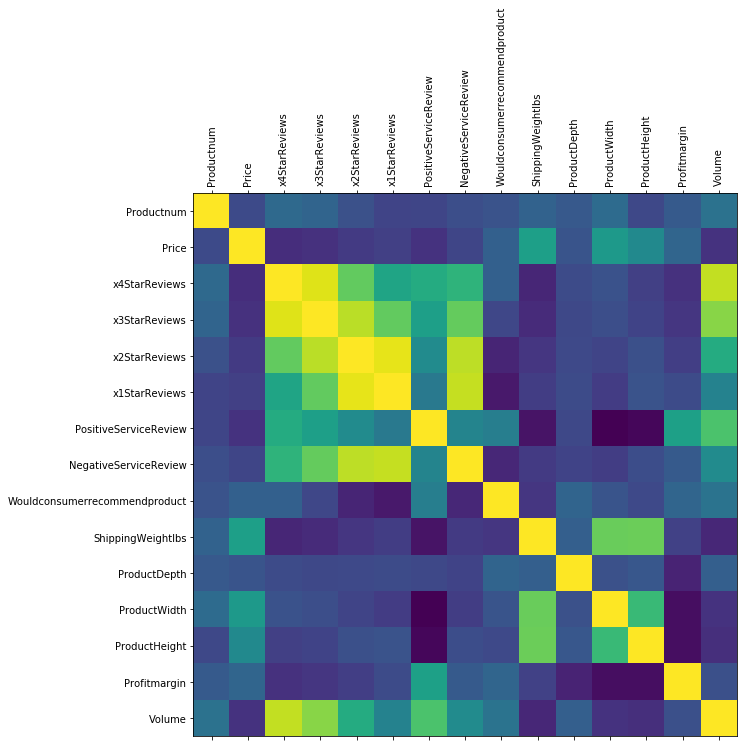

In [23]:
df_existingAttributes_scaled_correlations = df_existingAttributes_scaled.corr()
display(df_existingAttributes_scaled_correlations)

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(df_existingAttributes_scaled)


* <span style = 'color:red'>  As we observed previosly in the multi-variate plots, there is a strong correlation between rating and service review vs. volume, however here we also see a strong correlation between shipping weight and product heigh/width (not that surprising but suggests you might be better of just using weight as a feature instead of heigh and width)
    
<span style = 'color:red'>  Below, we plot the correlation factors for volume

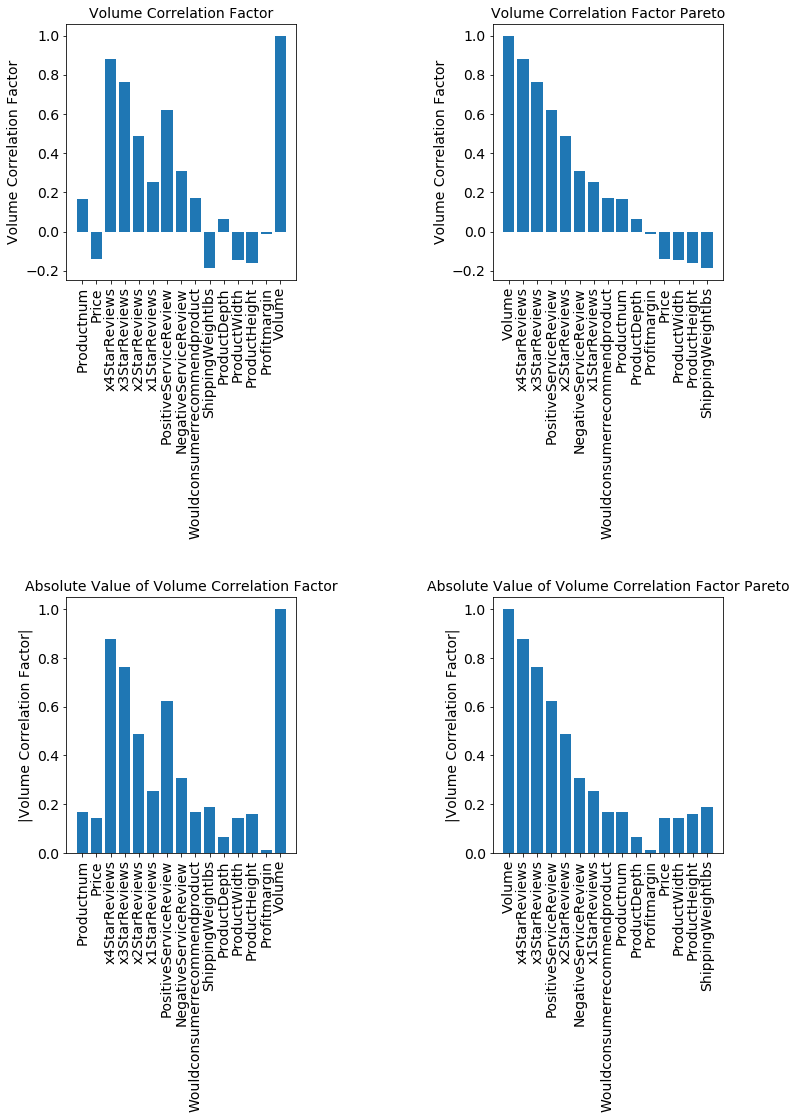

In [24]:
#Sort by correlation factor

df_correlations_volume_subset = df_existingAttributes_scaled_correlations['Volume']
df_correlations_volume_subset_sorted = df_existingAttributes_scaled_correlations['Volume'].sort_values(ascending=False)

#Correlation Factors for Volume axis
plt.subplot(2,2,1)
plt.bar(df_correlations_volume_subset.index,df_correlations_volume_subset)
plt.xticks(rotation = 'vertical')
plt.ylabel('Volume Correlation Factor',fontsize = 14)
plt.title('Volume Correlation Factor', fontsize = 14)
plt.tick_params(axis='both',labelsize = 14)

plt.subplot(2,2,2)
plt.bar(df_correlations_volume_subset_sorted.index,df_correlations_volume_subset_sorted)
plt.xticks(rotation = 'vertical')
plt.ylabel('Volume Correlation Factor',fontsize = 14)
plt.title('Volume Correlation Factor Pareto', fontsize = 14)
plt.tick_params(axis='both',labelsize = 14)

plt.subplot(2,2,3)
plt.bar(df_correlations_volume_subset.index,abs(df_correlations_volume_subset))
plt.xticks(rotation = 'vertical')
plt.title('Absolute Value of Volume Correlation Factor', fontsize = 14)
plt.ylabel('|Volume Correlation Factor|', fontsize = 14)
plt.tick_params(axis='both',labelsize = 14)

plt.subplot(2,2,4)
plt.bar(df_correlations_volume_subset_sorted.index,abs(df_correlations_volume_subset_sorted))
plt.xticks(rotation = 'vertical')
plt.title('Absolute Value of Volume Correlation Factor Pareto', fontsize = 14)
plt.ylabel('|Volume Correlation Factor|', fontsize = 14)
plt.tick_params(axis='both',labelsize = 14)

plt.tight_layout(rect=[0,0,2,4])
plt.show()

The Correlation Matrix

In the results tab, you should see a correlation matrix (example shown below) where you can review the strength of the relationships between every feature. Each correlation is a number between negative one and positive one. Positive numbers imply positive associations while negative numbers imply inverse associations. The following steps will help you interpret this matrix.

1. Check for high correlations with the dependent variable. Look at the Volume column. Are there any correlations that are above 0.95? If so, note the associated attributes.
    * <span style = "color:red"> 5 Star reviews would be over 95%, but we have dropped this data
    
    
2. Using the 'pairwise table' on the left Check for collinearity between the features. Search through the table to see if any of the independent variables have correlation coefficients of 0.90 or higher with any of the other independent variables. If any of the independent variables are collinear you might need to remove one of the two of them to address the collinearity.


In [25]:
df_existingAttributes_scaled_correlations[df_existingAttributes_scaled_correlations>=0.9]

,Productnum,Price,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Wouldconsumerrecommendproduct,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Profitmargin,Volume
Productnum,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x4StarReviews,NaN,NaN,1.000000,0.937214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x3StarReviews,NaN,NaN,0.937214,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2StarReviews,NaN,NaN,NaN,NaN,1.000000,0.951913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x1StarReviews,NaN,NaN,NaN,NaN,0.951913,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PositiveServiceReview,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NegativeServiceReview,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wouldconsumerrecommendproduct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ShippingWeightlbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


<span style = 'color:red'> it appears 1 star + 2 star and 3 star + 4 star have colinearity above 0.9.

3. Back in the design view, use the Select Attributes operator to remove the features you identified in the preceding steps.



In [26]:
#define features
Features = pd.DataFrame(df_existingAttributes_scaled_correlations.columns, columns = ['Features'])
Features = Features[Features['Features']!='x3StarReviews'] #drop 3 star
Features = Features[Features['Features']!='x1StarReviews'] #drop 1 star

Label = 'Volume'

Features = Features[Features['Features']!=Label].reset_index(drop=True)
Features

,Features
0,Productnum
1,Price
2,x4StarReviews
3,x2StarReviews
4,PositiveServiceReview
5,NegativeServiceReview
6,Wouldconsumerrecommendproduct
7,ShippingWeightlbs
8,ProductDepth
9,ProductWidth


## 6. Train and Assess the Models

In this step we will work with three algorithms: 
1. KNN
2. SVM
3. Gradient Boosted Trees 

(check the resources for more information on each).

### Set up the modeling process

With feature selection complete, it's time to update your process for modeling. On the design screen you need to do the following:

1. Disable and remove the Correlation Matrix operator
    * <span style = "color:red"> only applies to Rapidminer
2. Insert a Cross Validation operator into your process
    * <span style = "color:red"> only applies to Rapidminer
3. Open the Cross Validation operator: 
    * Leave the Training side empty for now
    * On the Testing side add the Apply Model operator and the Performance(for Regression) operator
    * Click on the Performance operator. On the Parameters tab place check marks next to the performance metrics "root mean squared error" and "squared correlation"
    Make sure to connect everything in your process 
    Set Volume to "label"
    
### Out of the Box

To begin our modeling we run each algorithm with default parameter settings. This is called "Out of the Box." Later, during model optimization we will change the default settings to "tune" our models for better fit. 

1. Open the Cross Validation operator. Place and connect one of the algorithms listed above. Lets use KNN first.
    * <span style = "color:red"> for and example of KNN in SciKit Learn we refer to https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


2. Click “run” to run the classifier "Out of the Box". 
Inspect and document the resulting performance metrics.
    * Locate the PerformanceVector Tab and specifically the RMSE and R-Squared values.
    * If the the RMSE is zero and R-Squared is 1 this might be a perfect correlation, but it might also be a sign of overfitting the model. In predictive analytics very high correlations might indicate Overfit; an Overfit model is a model that has learned the training data so well that it will not generalize well to new data. You can read more about Overfit in the resources.

In [27]:
#define 'out of the box' / default settings from rapidminer

def RM_defaults(model_type):
    if model_type =='KNN':
        RM_model_settings = {'k': 5,
                      'weighted_vote': True,
                      'measure_types': 'Mixed_Measures',
                      'measure_types_sub' : 'Mixed_Euclidean_Distance'}
    return RM_model_settings

In [28]:
#KNN model

#fetch rapid miner default settings for KNN
RM_model_settings = RM_defaults('KNN')

#repeat scaling but only for the features of interest this time
df_existingAttributes_subset = df_existingAttributes[list(Features['Features'])+[Label]]
df_newAttributes_subset = df_newAttributes[list(Features['Features'])+[Label]]

df_existingAttributes_scaled = scale_the_data(df_existingAttributes_subset, mode = 'fit_transform')
df_newAttributes_scaled = scale_the_data(df_newAttributes_subset, mode = 'transform')

display(df_existingAttributes_scaled.head())
df_existingAttributes_scaled.describe()

#drop nan values in features and labels
df_existingAttributes_scaled = df_existingAttributes_scaled.dropna(subset=Features['Features'])
df_existingAttributes_scaled = df_existingAttributes_scaled.dropna(subset=[Label]).reset_index(drop=True)

#define X y for ML model
X = df_existingAttributes_scaled[Features['Features']]
y = df_existingAttributes_scaled[[Label]]

X_train = X
y_train = y

display(X)
display(y)

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Productnum,Price,x4StarReviews,x2StarReviews,PositiveServiceReview,NegativeServiceReview,Wouldconsumerrecommendproduct,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Profitmargin,Volume
0,0.000000,0.420853,0.006961,0.000000,0.003731,0.000000,0.888889,0.409430,0.079800,0.208504,0.654651,0.285714,0.001071
1,0.010101,1.000000,0.002320,0.000000,0.001866,0.000000,0.888889,0.793618,0.116667,1.000000,0.736434,0.571429,0.000714
2,0.020202,0.176016,0.000000,0.000000,0.001866,0.000000,0.888889,0.276076,0.035000,0.261417,0.395349,0.085714,0.001071
3,0.030303,0.180908,0.044084,0.008108,0.013060,0.071429,0.777778,0.090332,0.050000,0.311811,0.050388,0.085714,0.017494
4,0.040404,0.479164,0.071926,0.018919,0.013060,0.178571,0.666667,0.110970,0.043000,0.009449,0.344961,0.114286,0.020707


,Productnum,Price,x4StarReviews,x2StarReviews,PositiveServiceReview,NegativeServiceReview,Wouldconsumerrecommendproduct,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Profitmargin
0,0.000000,0.420853,0.006961,0.000000,0.003731,0.000000,0.888889,0.409430,0.079800,0.208504,0.654651,0.285714
1,0.010101,1.000000,0.002320,0.000000,0.001866,0.000000,0.888889,0.793618,0.116667,1.000000,0.736434,0.571429
2,0.020202,0.176016,0.000000,0.000000,0.001866,0.000000,0.888889,0.276076,0.035000,0.261417,0.395349,0.085714
3,0.030303,0.180908,0.044084,0.008108,0.013060,0.071429,0.777778,0.090332,0.050000,0.311811,0.050388,0.085714
4,0.040404,0.479164,0.071926,0.018919,0.013060,0.178571,0.666667,0.110970,0.043000,0.009449,0.344961,0.114286
5,0.050505,0.049243,0.069606,0.024324,0.022388,0.044643,0.222222,0.025242,0.019333,0.125984,0.038760,0.000000
6,0.060606,0.167553,0.006961,0.000000,0.005597,0.000000,0.888889,0.115733,0.022333,0.324409,0.445736,0.000000
7,0.070707,0.027462,0.044084,0.013514,0.009328,0.026786,0.666667,0.190348,0.026333,0.211024,0.085271,0.000000
8,0.080808,0.051812,0.020882,0.000000,0.003731,0.008929,0.777778,0.028417,0.035333,0.296063,0.182171,0.000000
9,0.090909,0.005961,0.002320,0.000000,0.003731,0.000000,0.888889,0.011748,0.035667,0.412598,0.023256,0.000000


,Volume
0,0.001071
1,0.000714
2,0.001071
3,0.017494
4,0.020707
5,0.029632
6,0.003927
7,0.011782
8,0.005712
9,0.003570


In [29]:
from sklearn.svm import SVR
    
#Define KNN Model
def fit_KNN_Regressor(X,y,k):
    from sklearn.neighbors import KNeighborsRegressor

    model = KNeighborsRegressor(n_neighbors=k)
    y_predicted = model.fit(X, y).predict(X)

    #evaluate performance metrics
    RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y,y_predicted))
    R2_score = sklearn.metrics.r2_score(y,y_predicted)
    
    performance_metrics = pd.DataFrame(np.array([k, RMSE, R2_score]).reshape((1,3)),
                                       columns = ['k','RMSE','R2_score'])

    return y_predicted, performance_metrics, model

#Define SVM Regresso Model
def fit_SVM_Regressor(X,y,
                      kernel='rbf',#dot is the default for rapid miner
                      C = 1
                     ):
    from sklearn.svm import SVR
    
    y = np.array(y)[:,0] #transform to 1D array from pandas df

    model = SVR(kernel=kernel,
              degree=3, 
              gamma='auto', 
              coef0=0.0, #rapid miner default == 0
              tol=0.001, #rapid miner = convergence epsilon == 0.001
              C=C, #rapid miner default ==0
              epsilon=0.1, #rapid miner default == 0
              shrinking=True, 
              cache_size=200, #rapid miner default == 200
              verbose=False, 
              max_iter=-1) # rapid miner default == 100000
    
    y_predicted = model.fit(X, y).predict(X)

    #evaluate performance metrics
    RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y,y_predicted))
    R2_score = sklearn.metrics.r2_score(y,y_predicted)
    
    performance_metrics = pd.DataFrame(np.array([C, kernel, RMSE, float(R2_score)]).reshape((1,4)),
                                       columns = ['C','kernel','RMSE','R2_score'])

    return y_predicted, performance_metrics, model

#Define Gradient Boosted Tree
def fit_Gradient_Boosted_Regressor(X,y,
                                  n_estimators=20, #rapidminer default is == 20
                                  max_depth=5
                     ):
    from sklearn import ensemble
    
    y = np.array(y)[:,0] #transform to 1D array from pandas df

    model = ensemble.GradientBoostingRegressor(loss='ls', 
                                   learning_rate=0.1, 
                                   n_estimators=n_estimators, #==Number of Trees
                                   subsample=1.0, 
                                   criterion='friedman_mse', 
                                   min_samples_split=10, #rapid miner default == 10 
                                   min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0, 
                                   max_depth=max_depth, #rapid miner default == 5
                                   min_impurity_decrease=0.0, 
                                   min_impurity_split=None, 
                                   init=None, 
                                   random_state=None, 
                                   max_features=None, 
                                   alpha=0.9, 
                                   verbose=0, 
                                   max_leaf_nodes=None, 
                                   warm_start=False, 
                                   presort='auto', 
                                   validation_fraction=0.1, 
                                   n_iter_no_change=None, 
                                   tol=0.0001)
    
    y_predicted = model.fit(X, y).predict(X)

    #evaluate performance metrics
    RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y,y_predicted))
    R2_score = sklearn.metrics.r2_score(y,y_predicted)
    
    performance_metrics = pd.DataFrame(np.array([n_estimators, max_depth, RMSE, float(R2_score)]).reshape((1,4)),
                                       columns = ['n_Trees','max_depth','RMSE','R2_score'])

    return y_predicted, performance_metrics, model

In [30]:
y_predicted, performance_metrics, model = fit_KNN_Regressor(X,y,k=RM_model_settings['k'])

display(performance_metrics)

,k,RMSE,R2_score
0,5.0,0.08912,0.561145


<span style = "color:red"> The R2 score isn't 1, so it's not overfitting, but it's hard to tell whether or not this R2 score is acceptable since we haven't split into training and test data yet and we haven't explore different K values and evaluated on a testing set

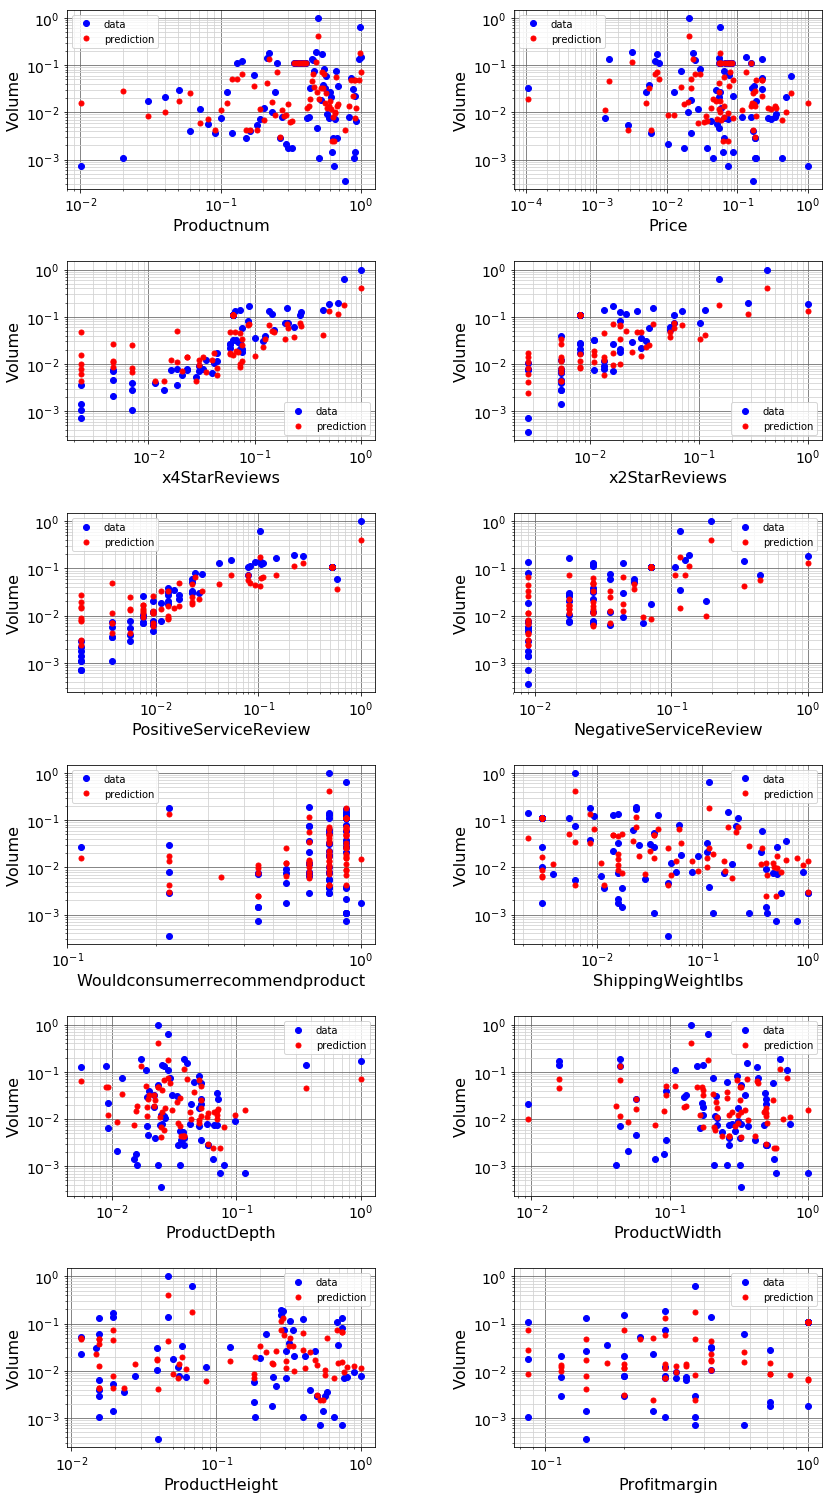

In [31]:
#Plot predictions vs data
def plot_y_and_y_predicted_vs_columns_of_interest(X, y, y_predicted, columns_of_interest):
    for i in range(len(columns_of_interest)):      
        #try:
        plt.subplot(int(len(columns_of_interest)/2)+1,2,i+1)
        plt.plot(X[columns_of_interest[i]], y, 'o',c='b',markersize=6)
        plt.plot(X[columns_of_interest[i]], y_predicted, 'o',c='r', markersize=5)
        plt.xlabel(columns_of_interest[i], fontsize = 16)
        plt.ylabel(y.columns[0] , fontsize = 16)
        plt.xscale('log')
        plt.yscale('log')
        plt.legend(['data','prediction'])
        plt.grid(which='major',color = 'dimgray')
        plt.grid(which='minor',color='lightgray')
        plt.tick_params(axis='both',labelsize = 14)
#         except:
#             print('Could not plot Volume vs. '+columns_of_interest[i])
    
    plt.tight_layout(rect=[0,0,2,6])
    
plot_y_and_y_predicted_vs_columns_of_interest(X, y, y_predicted, columns_of_interest=X.columns)
plt.show()

<span style = "color:red"> Based on the multi-variate plots, we can see that the model is predicting generally similar trends to the data. It should be noted though that we could essentially make a perfect prediciton just by fitting a line to 5 star rating vs volume, but this doesn't really seem like the point of this task so we won't go into that

### Optimization

#### Find the best performance point for the model.
Your goal is to find the combination of parameter settings for the model which results in the least level of comparative error and the highest R-Squared. The optimal performance for this model with this specific data set could be the first or the last thing that you try. There is no way of knowing which will be the best before you start—it is essential that you vary the parameter values and compare the error metrics until you see no further improvement.

#### To get a handle on this "optimization" process, start by experimenting with the number of neighbors (this is specific to KNN):

1. Open the Cross Validation Operator and click on the KNN operator. In the parameters tab, note that "Out of the Box" meant that the value of K was 1. Change this value to 2 and run the algorithm again.
2. Compare the performance metrics of 2 and 1. Is using 2 neighbors in the model better than 1 neighbor or worse? If performance is worse with 2 neighbors, then you will retain 1 as the number of neighbors and try the next setting. If 2 is better than 1, then you will try 3 neighbors and compare 3 to 2 and so on.
3. Try tuning the next relevant parameter value and compare error metrics until you find the best setting. Refer to the information on the classifier parameters in the Learning Resources page
    * TIP:
        * Note: It is not unusual to see high error rates in a regression analysis. When conducting a regression analysis, you will often see high error rates (in comparison to a classification analysis for example) because you are trying to predict a precise number. But that doesn’t mean that the algorithm is not getting it in the right range. The goal is to get the best result that you can given the data you have.

4. Continue the process until you have all the parameter values tuned as best you feel you can for this classifier.

In [32]:
def hyperparameter_sweep(X,y,
                         model_ID = 'KNN_Regressor',
                         hyper_parameter_bounds = [1,11]):
    
    #iterate through different values of k
    df_compiled_performance_metrics = pd.DataFrame()
    #print('\n')
    for hyper_parameter in range(hyper_parameter_bounds[0],hyper_parameter_bounds[1]):
        #print('     evaulating hyper_parameter:', hyper_parameter)
        if model_ID == 'KNN_Regressor':
            y_predicted, performance_metrics, model = fit_KNN_Regressor(X,y,k=hyper_parameter)
        elif model_ID == 'SVM_Regressor':
            y_predicted, performance_metrics, model = fit_SVM_Regressor(X,y,kernel=kernel,C=hyper_parameter)
        elif model_ID == 'Gradient_Boosted_Regressor':
            y_predicted, performance_metrics, model = fit_Gradient_Boosted_Regressor(X,y,n_estimators=hyper_parameter, max_depth=5)
        #compile metrics
        df_compiled_performance_metrics = pd.concat([df_compiled_performance_metrics,performance_metrics],axis=0).reset_index(drop=True)
    #print('     hyper_parameter sweep complete \n')
    #plot the results
    plt.plot(np.array(df_compiled_performance_metrics.iloc[:,0],dtype=float),np.array(df_compiled_performance_metrics['R2_score'],dtype=float),c='b')
    plt.xlabel('hyper_parameter',fontsize=16)
    plt.ylabel('R2_score',fontsize=16)
    plt.grid(which='major',color = 'dimgray')
    plt.grid(which='minor',color='lightgray')
    plt.tick_params(axis='both',labelsize = 14)
    plt.ylim(0,1.05)
    
    return df_compiled_performance_metrics

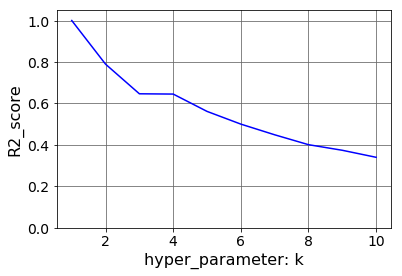

In [89]:
#Perform hyperparameter sweep for KNN
df_compiled_performance_metrics = hyperparameter_sweep(X,y,model_ID='KNN_Regressor',hyper_parameter_bounds=[1,11])
plt.xlabel('hyper_parameter: k')
plt.show()

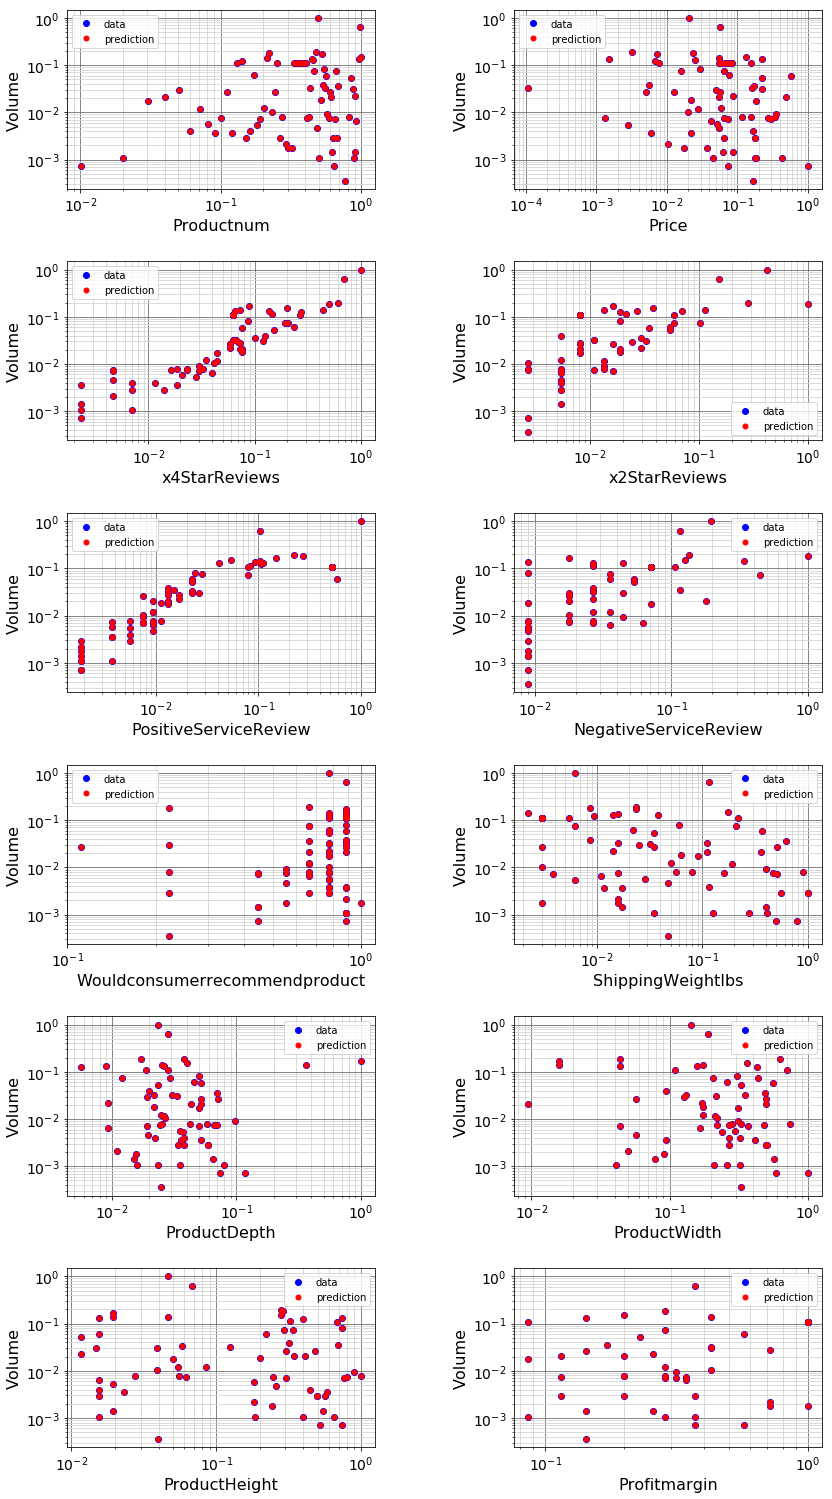

In [34]:
#Visualize the data for the best k model

#fetch k value with best R2_score
k_best = df_compiled_performance_metrics['k'][df_compiled_performance_metrics['R2_score'].idxmax()]

y_predicted, performance_metrics, model = fit_KNN_Regressor(X,y,k=int(k_best))

plot_y_and_y_predicted_vs_columns_of_interest(X, y, y_predicted, columns_of_interest=X.columns)
plt.show()

<span style = "color:red"> purely based on the R2, the best k value is 1, which gives an R2 score of 1. While the data is fit perfectly, this does not necessarly imply to me that over-fitting is occuring, since we havent evaulated against the test set yet, but it seems highly probably that it is overfitting

5. Repeat the steps above for the remaining two models changing the values of 'C' for SVM and 'number of trees' for Gradient Boosted Trees. Consult the resources for the tuning parameters specific to each algorithm that can be used for tuning.

## SVM

In [35]:
#test out 1 SVM case
y_predicted, performance_metrics, model = fit_SVM_Regressor(X,y,kernel='rbf', C=10)
display(performance_metrics)

,C,kernel,RMSE,R2_score
0,10,rbf,0.059664194451848236,0.8033044866237568



 Perform hyperparameter sweep (C) for SVM for different kernels: 

completed sweep for rbf kernel
completed sweep for linear kernel
completed sweep for poly kernel
completed sweep for sigmoid kernel


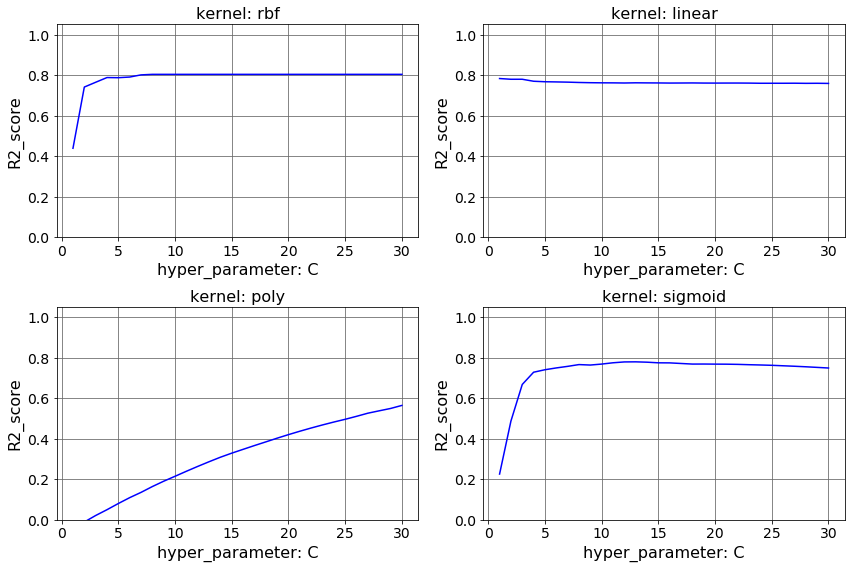

In [36]:
print('\n Perform hyperparameter sweep (C) for SVM for different kernels: \n')

df_compiled_performance_metrics_SVM = pd.DataFrame()

plt.subplot(221)
kernel = 'rbf'
df_compiled_performance_metrics = hyperparameter_sweep(X,y,model_ID='SVM_Regressor',hyper_parameter_bounds=[1,31])
plt.title('kernel: '+df_compiled_performance_metrics['kernel'].drop_duplicates().reset_index(drop=True)[0],fontsize=16)
plt.xlabel('hyper_parameter: C')
df_compiled_performance_metrics_SVM = pd.concat((df_compiled_performance_metrics_SVM,df_compiled_performance_metrics),axis=0).reset_index(drop=True)
print('completed sweep for',kernel,'kernel')

plt.subplot(222)
kernel = 'linear'
#Perform hyperparameter sweep for SVM with radial basis function (RBF) kernel
df_compiled_performance_metrics = hyperparameter_sweep(X,y,model_ID='SVM_Regressor',hyper_parameter_bounds=[1,31])
plt.title('kernel: '+df_compiled_performance_metrics['kernel'].drop_duplicates().reset_index(drop=True)[0],fontsize=16)
plt.xlabel('hyper_parameter: C')
df_compiled_performance_metrics_SVM = pd.concat((df_compiled_performance_metrics_SVM,df_compiled_performance_metrics),axis=0).reset_index(drop=True)
print('completed sweep for',kernel,'kernel')

plt.subplot(223)
kernel = 'poly' 
#Perform hyperparameter sweep for SVM with radial basis function (RBF) kernel
df_compiled_performance_metrics = hyperparameter_sweep(X,y,model_ID='SVM_Regressor',hyper_parameter_bounds=[1,31])
plt.title('kernel: '+df_compiled_performance_metrics['kernel'].drop_duplicates().reset_index(drop=True)[0],fontsize=16)
plt.xlabel('hyper_parameter: C')
df_compiled_performance_metrics_SVM = pd.concat((df_compiled_performance_metrics_SVM,df_compiled_performance_metrics),axis=0).reset_index(drop=True)
print('completed sweep for',kernel,'kernel')

plt.subplot(224)
kernel = 'sigmoid'
#Perform hyperparameter sweep for SVM with radial basis function (RBF) kernel
df_compiled_performance_metrics = hyperparameter_sweep(X,y,model_ID='SVM_Regressor',hyper_parameter_bounds=[1,31])
plt.title('kernel: '+df_compiled_performance_metrics['kernel'].drop_duplicates().reset_index(drop=True)[0],fontsize=16)
plt.xlabel('hyper_parameter: C')
df_compiled_performance_metrics_SVM = pd.concat((df_compiled_performance_metrics_SVM,df_compiled_performance_metrics),axis=0).reset_index(drop=True)
print('completed sweep for',kernel,'kernel')

plt.tight_layout(rect=[0,0,2,2])
plt.show()

<span style = "color:red"> Sweeping through the hyper-parameter C (penalty parameter) for different kernels, we see the radial basis function (rbf), is likely the optimal kernel as it gives the highest R2 score with the lowest number of C and is probably not as likely to over-fit like the linear kernel

best fit performance metrics:


,C,kernel,RMSE,R2_score
0,8,rbf,0.059664194451848236,0.8033044866237568
1,9,rbf,0.059664194451848236,0.8033044866237568
2,10,rbf,0.059664194451848236,0.8033044866237568
3,11,rbf,0.059664194451848236,0.8033044866237568
4,12,rbf,0.059664194451848236,0.8033044866237568
5,13,rbf,0.059664194451848236,0.8033044866237568
6,14,rbf,0.059664194451848236,0.8033044866237568
7,15,rbf,0.059664194451848236,0.8033044866237568
8,16,rbf,0.059664194451848236,0.8033044866237568
9,17,rbf,0.059664194451848236,0.8033044866237568


C_best: 8.0


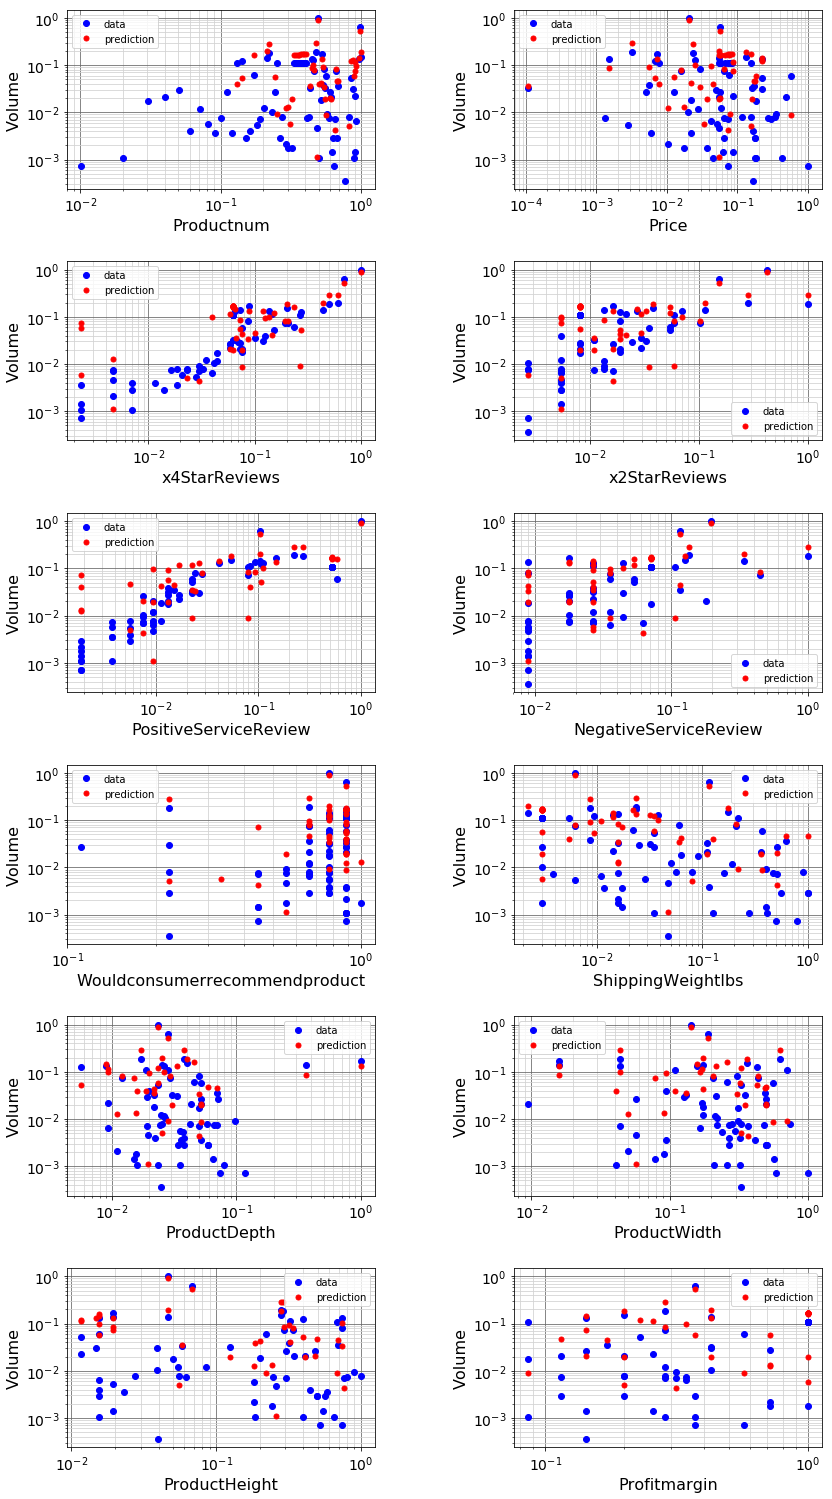

In [37]:
#visuale the data for the best SVM case
df_compiled_performance_metrics_SVM_best = df_compiled_performance_metrics_SVM[df_compiled_performance_metrics_SVM['kernel']=='rbf']
R2_score_max = np.array(df_compiled_performance_metrics_SVM_best['R2_score'],dtype=float).max()

performance_metrics_SVM_best = df_compiled_performance_metrics_SVM_best[np.array(df_compiled_performance_metrics_SVM_best['R2_score'],dtype=float)==R2_score_max].reset_index(drop=True)

print('best fit performance metrics:')
display(performance_metrics_SVM_best)

C_best = np.array(performance_metrics_SVM_best['C'],dtype=float).min()
print('C_best:',C_best)

#fetch k value with best R2_score

y_predicted, performance_metrics, model = fit_SVM_Regressor(X,y,C=C_best,kernel='rbf')

plot_y_and_y_predicted_vs_columns_of_interest(X, y, y_predicted, columns_of_interest=X.columns)
plt.show()

<span style = "color:red"> From the data visualization, we can see the SVM is more effective at avoiding over-fitting than the KNN

## Gradient Boosted Tree

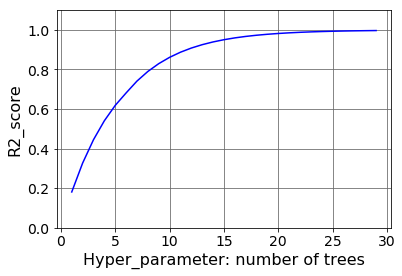

In [92]:
#Perform hyperparameter sweep for KNN
df_compiled_performance_metrics = hyperparameter_sweep(X,y,model_ID='Gradient_Boosted_Regressor',hyper_parameter_bounds=[1,30])
#plt.xscale('log')
plt.ylim(0,1.1)
plt.xlabel('Hyper_parameter: number of trees')
plt.show()

<span style = "color:red"> By the time we have 20 trees, the model seems to be overfitting. We will assume 10 trees is the optimal case

,n_Trees,max_depth,RMSE,R2_score
0,10.0,5.0,0.050107,0.86127


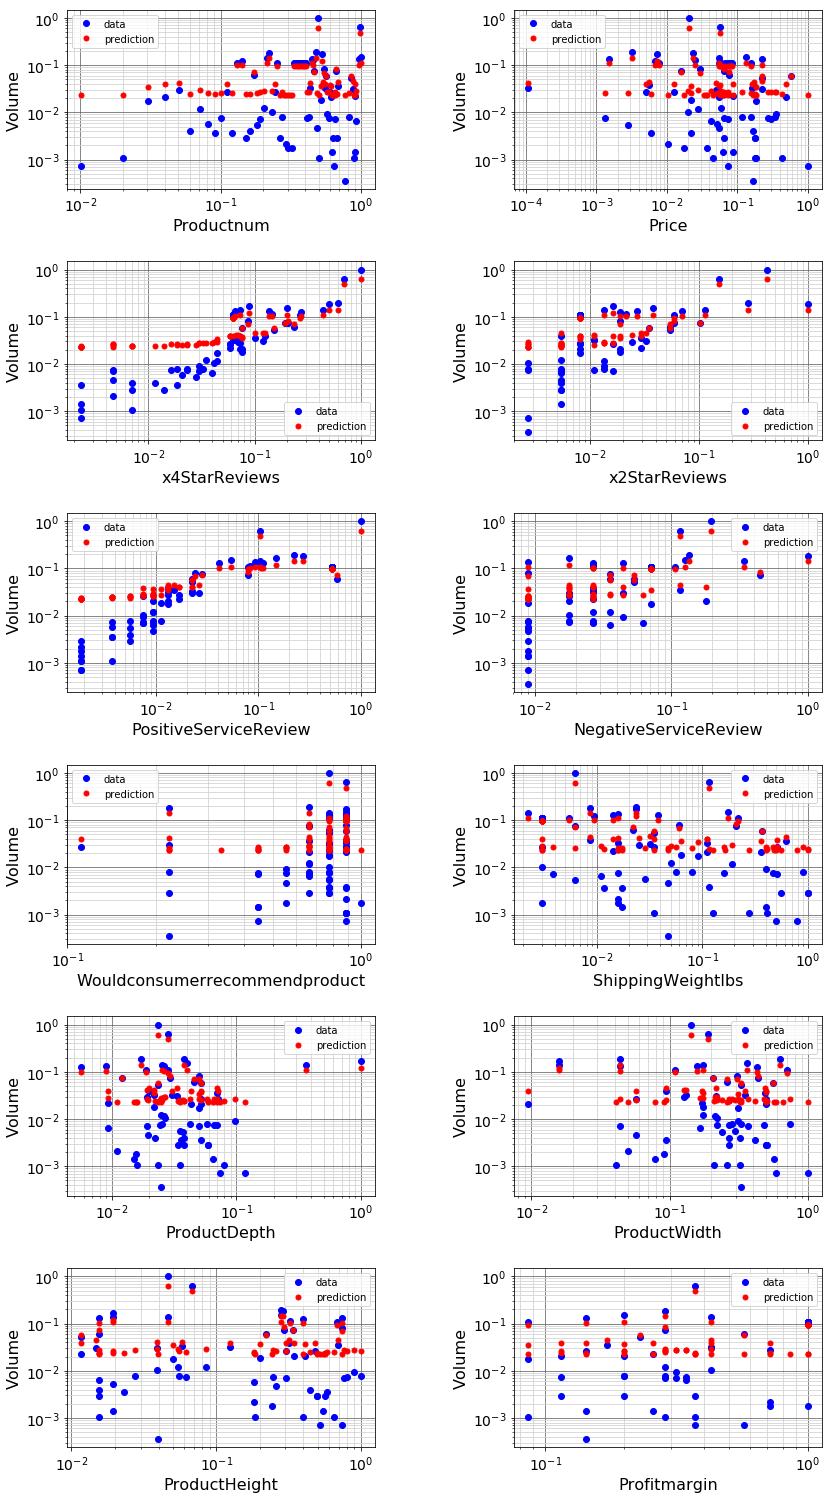

In [39]:
#visuale the data for the best GB regress

y_predicted, performance_metrics, model = fit_Gradient_Boosted_Regressor(X,y,n_estimators=10, max_depth=5)

display(performance_metrics)
plot_y_and_y_predicted_vs_columns_of_interest(X, y, y_predicted, columns_of_interest=X.columns)



<span style = "color:red"> Despite having a descent R2 score, we can see the gradient boosted tree diverges from the true volume for low 4 star reviews <1E-2

## Classifier Selection and Storing the Model

You have trained and optimized three classifiers. Now, you will need to compare their performance metrics and choose the model that best “fits” the data. When making your selection, be sure to note the associated parameters. You will need this information for your final report and to make predictions for the 24 new products. After selecting the most optimal model based on your previous training you will need to add to the same process to store the model so it can be used to make predictions on the for the 24 new products.

Add a “Store” operator after the Cross Validation operator. The Store operator saves the last model that was built so that it can later be used for predictions. You will need name this stored file and select a location in which to save it in the “repository entry” field.
After you have connected the necessary inputs and outputs, click Run. 

<span style = "color:red"> Most of these instructions are specific for rapidminer.
    
<span style = "color:red">Regardless, we will choose the optimized SVM as the most ideal model. There are 2 reasons for this:
1. <span style = "color:red">The SVM is less prone to over fitting than the KNN
2. <span style = "color:red">The GB regressor seems to over-fit in some regimens and under-fit in other regimes, while the SVM achieves a good R2 score without over or under fitting in one data regime or another (see the multivariate prediction visualizatio plots)

In [40]:
kernel_best='rbf'
C_best = float(C_best)

print('Best Model: SVM \n',
     'C_best:',C_best,
     '\n Kernel_best:',kernel_best)

y_predicted, performance_metrics, model = fit_SVM_Regressor(X_train,y_train,kernel=kernel_best,C=C_best)
model_best = model
performance_metrics_train = performance_metrics
y_predicted_train = y_predicted

display(performance_metrics_train )

print('model info:',model_best)

Best Model: SVM 
 C_best: 8.0 
 Kernel_best: rbf


,C,kernel,RMSE,R2_score
0,8.0,rbf,0.059664194451848236,0.8033044866237568


model info: SVR(C=8.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


# 7. Use the Model to Make Predictions
In the Modeling and Optimization step you trained and stored the classifier that best predicted the value of the dependent variable Volume. You will now use this model and the newProductAttributes.csv file to make sales volume predictions for Blackwell Electronics' 17 new products.

1. Open the Design View and disable all of your current operators. Don’t delete any as you may need to repeat earlier processes.
2. Import the newProductAttributes.csv file and then drag it into the design process. Recall that any changes you have made to the training data (existingProductAttributes.csv) you must also make identically to this file. With RapidMiner you can easily do this by copying and pasting the filters from the training set into your new process.



In [41]:
#select features+label subset from new Atrributes df
df_newAttributes_Scaled_Features_Label_Subset = df_newAttributes_scaled[list(Features['Features'])+[Label]]
display(df_newAttributes_Scaled_Features_Label_Subset.head())

,Productnum,Price,x4StarReviews,x2StarReviews,PositiveServiceReview,NegativeServiceReview,Wouldconsumerrecommendproduct,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Profitmargin,Volume
0,0.707071,0.309563,0.060325,0.037838,0.022388,0.026786,0.666667,0.315764,0.068767,0.606299,0.325194,0.571429,0.0
1,0.717172,0.381234,0.025522,0.027027,0.013060,0.044643,0.555556,0.428481,0.072967,0.850709,0.353876,0.428571,0.0
2,0.727273,0.532143,0.023202,0.008108,0.020522,0.044643,0.777778,0.104620,0.029800,0.403150,0.026357,0.142857,0.0
3,0.747475,0.532143,0.004640,0.002703,0.003731,0.008929,0.555556,0.206223,0.054333,0.340157,0.054264,0.285714,0.0
4,0.757576,0.888270,0.002320,0.008108,0.000000,0.008929,0.222222,0.183997,0.056033,0.343307,0.034109,0.514286,0.0


3. In the modeling step you added a Store operator to save the last model that you created. To access this saved model and make predictions you need to drag the model from Repository into the design process.
4. Insert the Apply Model operator into your process and connect all ports.
                                  

5. Click Run and then inspect the example set tab of the results. Find the prediction column and note the predicted Volume for all 17 new products.
6. You are now ready to write your report.

In [42]:
def test_model(X,y,model):
    y_predicted = model.predict(X)
    
    #evaluate performance metrics
    RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y,y_predicted))
    R2_score = sklearn.metrics.r2_score(y,y_predicted)
    
    performance_metrics = pd.DataFrame(np.array([RMSE, R2_score]).reshape((1,2)),
                                       columns = ['RMSE','R2_score'])
    
    return y_predicted, performance_metrics
    
#define X, y inputs
X_test = df_newAttributes_Scaled_Features_Label_Subset[Features['Features']]
y_test = df_newAttributes_Scaled_Features_Label_Subset[[Label]]

y_predicted, performance_metrics = test_model(X_test,y_test,model_best)
performance_metrics_test = performance_metrics
y_predicted_test = y_predicted

<span style = "color:red"> Note that though we call this the 'test' set, it isn't really a typical test set since we don't actually have volume values to compare against. Basically we are just using this as a set of data which we want to make predictions on, but we cannot know how accurate those predictions are until the actual volume is measured in the field

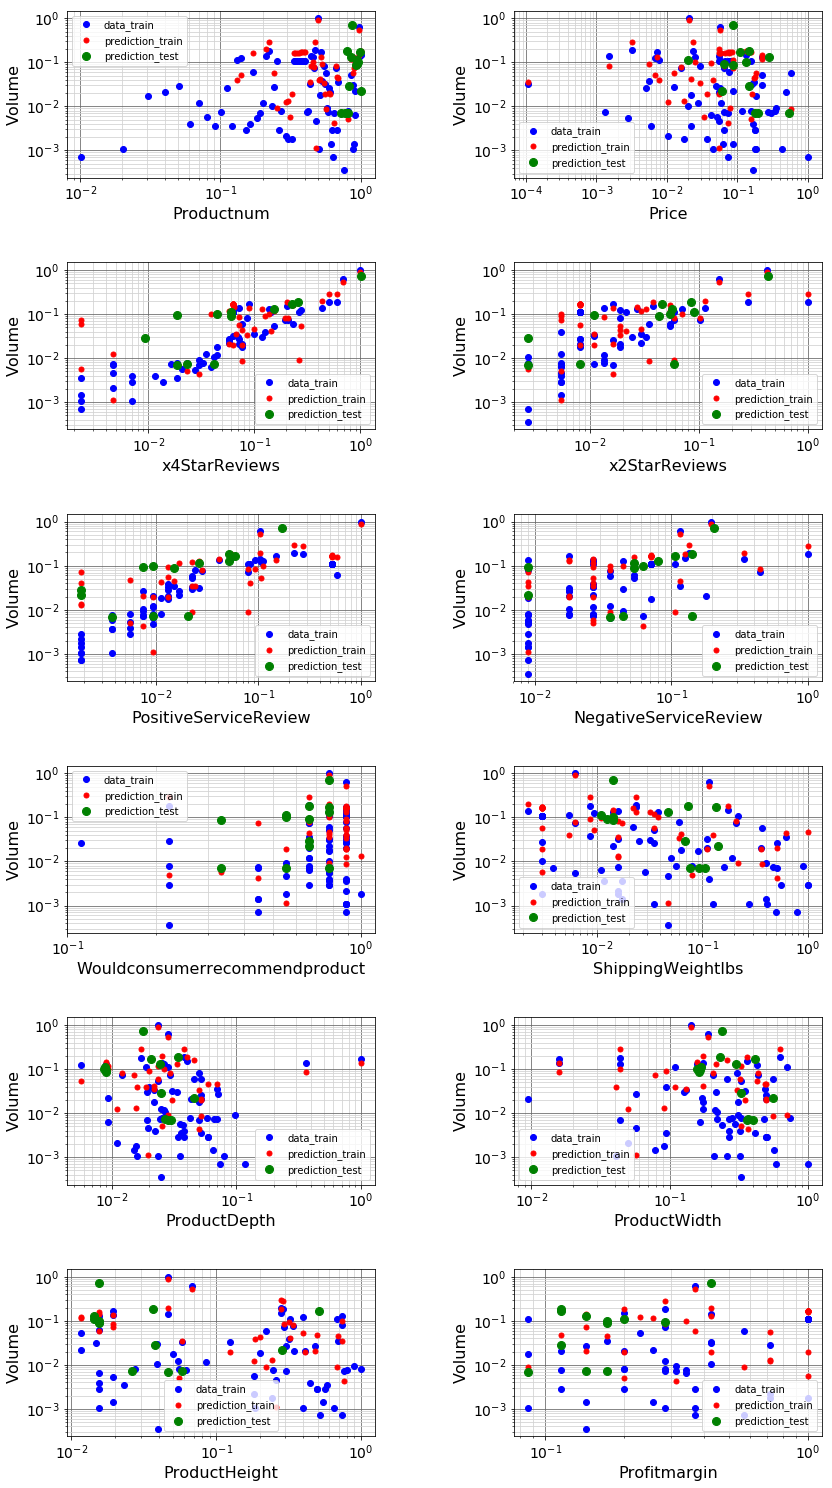

In [43]:
#Plot predictions vs data
def plot_train_test_predictions(X_train, X_test, y_train, y_predicted_train, y_predicted_test, columns_of_interest):
    for i in range(len(columns_of_interest)):      
        #try:
        plt.subplot(int(len(columns_of_interest)/2)+1,2,i+1)
        plt.plot(X_train[columns_of_interest[i]], y_train, 'o',c='b',markersize=6)
        plt.plot(X_train[columns_of_interest[i]], y_predicted_train, 'o',c='r',markersize=5)
        plt.plot(X_test[columns_of_interest[i]], y_predicted_test, 'o',c='g', markersize=8)
        plt.xlabel(columns_of_interest[i], fontsize = 16)
        plt.ylabel(y.columns[0] , fontsize = 16)
        plt.xscale('log')
        plt.yscale('log')
        plt.legend(['data_train','prediction_train','prediction_test'])
        plt.grid(which='major',color = 'dimgray')
        plt.grid(which='minor',color='lightgray')
        plt.tick_params(axis='both',labelsize = 14)
#         except:
#             print('Could not plot Volume vs. '+columns_of_interest[i])
    
    plt.tight_layout(rect=[0,0,2,6])
    
plot_train_test_predictions(X_train, X_test, y_train, y_predicted_train, y_predicted_test, columns_of_interest = X_train.columns)

In [52]:
#unscale the prediction_test data
Xy_predicted_test = pd.concat((X_test,
                               pd.DataFrame(y_predicted_test,
                                            columns =[Label+'_predicted_test'] )),
                               axis=1)


Xy_predicted_test_unscaled = pd.DataFrame(scaler.inverse_transform(Xy_predicted_test),columns = [Xy_predicted_test.columns])
display(Xy_predicted_test_unscaled)

y_predicted_test_unscaled = Xy_predicted_test_unscaled[[Label+'_predicted_test']]

Xy_predicted_test_unscaled.to_csv(path_or_buf='Xy_predicted_test_unscaled.csv')

,Productnum,Price,x4StarReviews,x2StarReviews,PositiveServiceReview,NegativeServiceReview,Wouldconsumerrecommendproduct,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Profitmargin,Volume_predicted_test
0,171.0,699.00,26.0,14.0,12.0,3.0,0.7,19.9,20.63,19.25,8.39,0.25,-53.718668
1,172.0,860.00,11.0,10.0,7.0,5.0,0.6,27.0,21.89,27.01,9.13,0.20,-684.662464
2,173.0,1199.00,10.0,3.0,11.0,5.0,0.8,6.6,8.94,12.80,0.68,0.10,80.383689
3,175.0,1199.00,2.0,1.0,2.0,1.0,0.6,13.0,16.30,10.80,1.40,0.15,-2.865233
4,176.0,1999.00,1.0,3.0,0.0,1.0,0.3,11.6,16.81,10.90,0.88,0.23,-63.417663
5,178.0,399.99,8.0,1.0,2.0,4.0,0.6,5.8,8.43,11.42,1.20,0.08,78.103871
6,180.0,329.00,112.0,31.0,28.0,16.0,0.7,4.6,10.17,7.28,0.95,0.09,2073.981306
7,181.0,439.00,18.0,22.0,5.0,16.0,0.4,4.8,8.00,11.70,1.50,0.11,81.157771
8,183.0,330.00,4.0,1.0,1.0,0.0,0.7,4.3,7.40,10.40,0.97,0.09,320.296001
9,186.0,629.00,66.0,21.0,28.0,9.0,0.8,3.0,7.31,9.50,0.37,0.10,1461.779379


# 8. Report your Findings
The following steps will help you complete your report for Danielle. 

1. Open the profitability.csv file you downloaded at the beginning of this project
2. Enter the volume predictions you made in the Volume column

In [57]:
y_predicted_test_unscaled

,Volume_predicted_test
0,-53.718668
1,-684.662464
2,80.383689
3,-2.865233
4,-63.417663
5,78.103871
6,2073.981306
7,81.157771
8,320.296001
9,1461.779379


In [65]:
df_profit_subset = df_profit.drop(columns='Volume')
headers = list(df_profit_subset.columns)+['Volume']
df_profit_subset = pd.concat((df_profit_subset,y_predicted_test_unscaled),axis=1)
df_profit_subset.columns = headers

display(df_profit_subset)

,ProductType,Productnum,BrandName,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,...,Wouldconsumerrecommendproduct,BestSellersRank,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Shipment,Profitmargin,DataID,Volume
0,PC,171,Dell,699.00,96,26,14,14,25,12,...,0.7,2498,19.9,20.63,19.25,8.39,Dropship,0.25,Profit Data,-53.718668
1,PC,172,Dell,860.00,51,11,10,10,21,7,...,0.6,490,27.0,21.89,27.01,9.13,Dropship,0.20,Profit Data,-684.662464
2,Laptop,173,Apple,1199.00,74,10,3,3,11,11,...,0.8,111,6.6,8.94,12.80,0.68,Inventory,0.10,Profit Data,80.383689
3,Laptop,175,Toshiba,1199.00,7,2,1,1,1,2,...,0.6,4446,13.0,16.30,10.80,1.40,Inventory,0.15,Profit Data,-2.865233
4,Laptop,176,Razer,1999.00,1,1,1,3,0,0,...,0.3,2820,11.6,16.81,10.90,0.88,Dropship,0.23,Profit Data,-63.417663
5,Netbook,178,HP,399.99,19,8,4,1,10,2,...,0.6,4140,5.8,8.43,11.42,1.20,Inventory,0.08,Profit Data,78.103871
6,Netbook,180,Acer,329.00,312,112,28,31,47,28,...,0.7,2699,4.6,10.17,7.28,0.95,Inventory,0.09,Profit Data,2073.981306
7,Netbook,181,Asus,439.00,23,18,7,22,18,5,...,0.4,1704,4.8,8.00,11.70,1.50,Dropship,0.11,Profit Data,81.157771
8,Netbook,183,Samsung,330.00,3,4,0,1,0,1,...,0.7,5128,4.3,7.40,10.40,0.97,Inventory,0.09,Profit Data,320.296001
9,Tablet,186,Apple,629.00,296,66,30,21,36,28,...,0.8,34,3.0,7.31,9.50,0.37,Inventory,0.10,Profit Data,1461.779379


3. Calculate predicted profit for each potential new product with the following formula: volume x profit margin x price = profit 

In [70]:
predicted_profit = pd.DataFrame(
                        df_profit_subset['Volume']*df_profit_subset['Profitmargin']*df_profit_subset['Price'],
                            columns = ['Predicted_Profit'])
df_profit_subset = pd.concat((df_profit_subset, predicted_profit),axis = 1)

4. Rank the 17 products by profit from highest to lowest. Highlight the top five products.

,ProductType,Productnum,BrandName,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,...,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,Shipment,Profitmargin,DataID,Volume,Predicted_Profit,ProductType_BrandName_Price
1,PC,172,Dell,860.00,51,11,10,10,21,7,...,27.0,21.89,27.01,9.13,Dropship,0.20,Profit Data,-684.662464,-117761.943794,PC_Dell_860.0
4,Laptop,176,Razer,1999.00,1,1,1,3,0,0,...,11.6,16.81,10.90,0.88,Dropship,0.23,Profit Data,-63.417663,-29157.538869,Laptop_Razer_1999.0
0,PC,171,Dell,699.00,96,26,14,14,25,12,...,19.9,20.63,19.25,8.39,Dropship,0.25,Profit Data,-53.718668,-9387.337302,PC_Dell_699.0
3,Laptop,175,Toshiba,1199.00,7,2,1,1,1,2,...,13.0,16.30,10.80,1.40,Inventory,0.15,Profit Data,-2.865233,-515.312088,Laptop_Toshiba_1199.0
16,Monitor,201,Asus,140.00,4,0,0,0,2,1,...,8.9,13.60,17.60,7.30,Inventory,0.05,Profit Data,248.757000,1741.299003,Monitor_Asus_140.0
5,Netbook,178,HP,399.99,19,8,4,1,10,2,...,5.8,8.43,11.42,1.20,Inventory,0.08,Profit Data,78.103871,2499.261387,Netbook_HP_399.99
7,Netbook,181,Asus,439.00,23,18,7,22,18,5,...,4.8,8.00,11.70,1.50,Dropship,0.11,Profit Data,81.157771,3919.108763,Netbook_Asus_439.0
12,Smartphone,194,Samsung,49.00,100,26,37,33,48,14,...,0.7,2.67,5.33,0.37,Inventory,0.12,Profit Data,1259.826469,7407.779637,Smartphone_Samsung_49.0
8,Netbook,183,Samsung,330.00,3,4,0,1,0,1,...,4.3,7.40,10.40,0.97,Inventory,0.09,Profit Data,320.296001,9512.791235,Netbook_Samsung_330.0
2,Laptop,173,Apple,1199.00,74,10,3,3,11,11,...,6.6,8.94,12.80,0.68,Inventory,0.10,Profit Data,80.383689,9638.004342,Laptop_Apple_1199.0


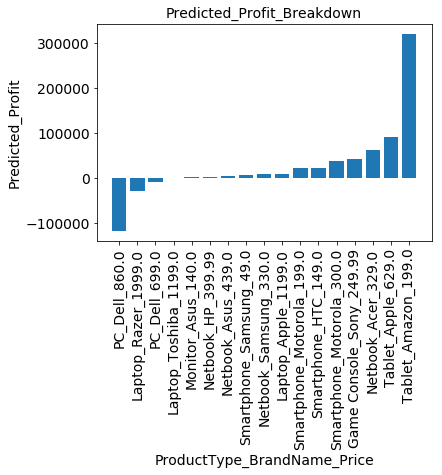

In [86]:
df_profit_subset_sorted = df_profit_subset.sort_values(by= 'Predicted_Profit')

#Concat product type and brand name
ProductType_BrandName_Price = pd.DataFrame(df_profit_subset_sorted['ProductType']+'_'+df_profit_subset_sorted['BrandName']+'_'+np.array(df_profit_subset_sorted['Price'],dtype=str), columns = ['ProductType_BrandName_Price'])
df_profit_subset_sorted = pd.concat((df_profit_subset_sorted , ProductType_BrandName_Price),axis=1)

display(df_profit_subset_sorted)

plt.bar(df_profit_subset_sorted['ProductType_BrandName_Price'],df_profit_subset_sorted['Predicted_Profit'])
plt.xticks(rotation = 'vertical')
plt.ylabel('Predicted_Profit',fontsize = 14)
plt.xlabel('ProductType_BrandName_Price', fontsize = 14)
plt.title('Predicted_Profit_Breakdown', fontsize = 14)
plt.tick_params(axis='both',labelsize = 14)

5. Write a brief summary of the optimized model you selected and your rationale for selecting it. Include the parameter settings for this model.
6. Include a summary of performance metrics for each of the classifiers you ran
Save and submit your report

____
____

# Submit Your Work
You are expected to submit the following deliverables for this task:

* New Product Profitability Predictions (Regression): Ranked profitability of potential new products, classifier selected and reasoning, logs from optimization process of both classifiers, include rationale. 
* For each method, did you experiment with adjusting the parameter values until you did not see an improvement in the error metrics?
* Did you include a brief explanation of your rationale for selecting the training model you did?
* Did you include a log of optimization process?


Submit your New Product Profitability Predictions (Regression Analysis) by clicking on the button below and uploading your document.

*** 

# <span style = "color:red"> Summary Report:
### Abstract

Here we summarize the machine-learning (ML) feature-engineering, pre-processing, model assessment, and model predictions carried out on Blackwell Electronics retail product data for new and existing products. Three key ML models were evaluated: (1) K-nearest neighbors (KNN) model, (2) support-vector machine (SVM) model, and (3) gradient-boosted decision forest (GB forest) model. For each model, a key hyper-parameter was varied and the resulting performance was analyzed to determine the optimal ML model. Using the optimal ML model, the volume for new products was predicted, allowing us to estimate the predicted profit for a given Product Type, Brand Name, and Price
    
### Preprocessing & Feature Engineering 
    
For the machine learning (ML) model development we used the "existingProductAttributes" data set. To ensure the ML models could be trained efficiently, we performed a min-max scaler transformation to transform all the numeric data from it's real-world range, which may vary widely for each feature, to a range from 0 to 1. This transformation preserves the relative difference between each of the data points for a given feature. 

Following the min-max scaler transformation, we performed a multi-variat plot visuallization to plot all features in the data vs. Volume. From this visualization, it became apparent that the 5 star review data was highly suspect as it had a perfect 1-1 linear correlation with volume, as shown in Figure 1 below:

#### <center>Figure 1: 5 Star Reviews vs Volume (Scaled) </center> 
<img src="Report_Figures/Volume_vs_5starReviews.png" style="height:300px" align="center">

Due to this perfect correlation with volume, the 5 star review feature was dropped from the data set (i.e. eliminated as a feature)


Next, a correlation matrix was constructed from the remaining data set. Such a matrix analyzes the linearity in the data across all numeric columns in the data. The correlation matrix can be seen below in Figure 2

#### <center>Figure 2: Correlation Matrix </center> 
<img src="./Report_Figures/01_Correlation_Matrix.png" style ="height:700px" align="center">
Here, the more yellow the color, the stronger the correlation. The more blue, the weaker the correlation. The numeric values for the correlations can be seen in the "Plan of Attack" Section. A Pareto of the correlation factors for Volume vs each feature can be seen in Figure 3 below:

#### <center>Figure 3: Volume Correlation Factor Pareto </center> 
<img src="./Report_Figures/Volume_Correlation_Pareto.png" style="height:600px" align="center">

Here, we see 4 Star Reviews have the strongest correlation, which is positive. It is perhaps important to note that the features with a negative correlation factor do not have weak correlations, they simply have a inverse, or negative correlation (i.e. as volume increases, the feature value decrease)

Before proceeding further, we also analyzed the correlation between the features themselves. This was done by observing the correlation matrix in Figure 2. Specifically, we found that 1 star + 2 star, as well as 3 star + 4 star reviews had cross-correlations > 0.9. To simplify the ML model, we discraded 1 star reviews and 3 star reviews as relevant features for predicting volume. The final selection of features from which the ML models were trained, tested, and predictions were made are show in Table 1:

#### <center>Table 1: ML Model Features </center> 
<img src="./Report_Figures/ML_Model_Features.png" style="width:300px" align="center">

    
### ML Model Optimization
With the features for ML model development selected, we evaluated three ML regression model types to predict volume given the features in Table 1. These model types were: (1) K nearest neighbors (KNN), (2) support-vector machine (SVM), and (3) gradient boosted forest/trees (GB forest). For each model type, one to two hyper-parameters were varied and the model performance was analyzed using the $R^2$ score. The $R^2$ score was calcualted according to the fxn: $R^2 = 1 - \frac{SS_{residuals}}{SS_{total}} = 1 - \frac{\sum (y_{true} - y_{predicted})^2}{\sum (y_{true} - y_{mean})^2} $, where $SS$ stands for sum of squares. Figures 4, 5, and 6, show the $R^2$ score vs. hyper-parameter value for each of the evalutated models respectively.

#### <center>Figure 4: KNN Hyper-parameter Sweep (K) </center> 
<img src="./Report_Figures/KNN_Hyper-parameter_Sweep.png" style="width:350px" align="center">
<br>
#### <center>Figure 5: SVM Hyper-parameter Sweep (C & Kernel) </center> 
<img src="./Report_Figures/SVM_Hyper-parameter_Sweep.png" style="width:700px" align="center">
<br>
#### <center>Figure 5: GB Forest Hyper-parameter Sweep (number of trees) </center> 
<img src="./Report_Figures/GBForest_Hyper-parameter_Sweep.png" style="width:350px" align="center">

From these hyper-parameter sweeps, we choose the SVM with a 'rbf' (radial basis function' kernel to be the most optimal model. There are two main reasons for this: (1) as can be seen in the figures, SVMs are generally less prone to over-fitting the data for an aribtrary hyper-parameter (i.e. less likely to achieve a $R^2$ score of 1), and (2) the 'rbf' kernel achieved the highest (non-overfitting) $R^2$ score with a small C value (basically this reduces the size/processing power required to evaluate the ML model). The final performance metrics for the optimal ML model chosen can be seen in Table 2:

#### <center>Table 2: Optimal ML Model (SVM) Performance Metrics </center> 
<img src="./Report_Figures/Optimal_ML_Model_Performance_Metrics.png" style="width:400px" align="center">

### Predicting Profitability
Using the optimal ML model described above, we predicted the expected sales volume for the products contained in the "newProdcutAttributes" data. We can visualize how this data set is related to the "existProductAttributes" data set by plotting multi-variate plots across the ML model features vs Volume. This is shown in Figure 6:

#### <center>Figure 6: Multi-variat plots of ML model Features vs. Volume </center> 
<img src="./Report_Figures/Final_Multivariate_Plot.png" style="width:600px" align="center">

Here, we can see the "newProductAttributes" data is in the same range of features as the "existingProductAttributes" data. This is generally a good thing since it implies that we are not relying on our ML model to extrapolate outside the range of the data we trained on.

With the Volume predicted, we calculate the predicted profit according to the function: 
<br> <Center>  $Profit = Volume * Profit \ Margin * Price $ </Center>
Finally, we create a new Unique ID/label to describe the a product completely by concatenating the Product Type, Brand Name, and Price together as a label. The predicted profit vs Unique ID breakdown can be seen in Figure 7:

#### <center>Figure 7: Predicted Profit vs. Unique ID/Label </center> 
<img src="./Report_Figures/Predicted_Profit.png" style="width:400px" align="center">

Here, we see that Amazon and Apple tablets are expected to yield the best profit. Noteably, Amazon tablets priced at 199 are expected to have exceptionally high profits. Also of note is the fact that Dell PCs and Razer Laptops are expected to have negative profits. Interestingly though, the negative profit for Dell PCs could be minimized by pricing at 699, instead of 860.

### Conclusions
Here we reviewed the preprocessing, feature engineering, ML model optimization, and profitability predictions for the "existingProductAtrributes" and "newProductAttributes" data sets. Based on the hyper-parameter sweeps for multiple ML regression models (KNN, SVM, and GB Forest), we were able to determine the optimal ML model for this task to be an SVM regressor with a C of 8 and a radial basis function kernel. Using this model, we predicted the profitability for a Unique product class, which we defined as the unique product type, brandname, and price. We showed that Tablets are expected to yield the highest profits, followed by smartphones, netbooks, and PCs/laptops. In particular Amazon Tablets prices at 199 are expected to yield >3X higher profits than any other unique product class, while Dell PCs are expected to yield significant negative profits.